In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random
from EA_funcs import *

# Data

In [2]:
start = '2021-03-27'
end = '2024-03-27'
tickers = ['TSLA.MX', 'AAPL.MX', 'AMZN.MX', 'AC.MX', 'KOFUBL.MX', 'VISTAA.MX',
           'CEMEXCPO.MX', 'AGUA.MX', 'ELEKTRA.MX', 'CUERVO.MX']
data = yf.download(tickers, start=start, end=end)['Close'][tickers]

C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\430823440.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)['Close'][tickers]
[*********************100%***********************]  10 of 10 completed


In [3]:
data

Ticker,TSLA.MX,AAPL.MX,AMZN.MX,AC.MX,KOFUBL.MX,VISTAA.MX,CEMEXCPO.MX,AGUA.MX,ELEKTRA.MX,CUERVO.MX
Date,,,,,,,,,,
2021-03-29,4196.106445,2502.169678,3175.750000,86.088875,82.082298,60.259998,13.884693,25.359915,1361.412231,44.105019
2021-03-30,4348.176758,2462.907227,3139.125000,85.398438,82.142487,60.000000,14.851538,25.385765,1367.399536,44.076733
2021-03-31,4559.640137,2501.250000,3172.500000,82.891563,81.162445,60.000000,14.373099,25.446085,1355.553223,44.086163
2021-04-05,4704.153320,2554.315430,3287.949951,84.708008,81.050690,57.000000,14.612318,26.669704,1359.804443,44.350151
2021-04-06,4654.479980,2544.886963,3269.500000,85.176514,81.334389,55.900002,14.123912,26.807575,1368.139282,44.680138
...,...,...,...,...,...,...,...,...,...,...
2024-03-20,2932.669922,2974.763672,2970.080078,170.741791,159.369385,715.000000,14.034204,30.030001,1145.791870,38.789322
2024-03-21,2896.060059,2865.168457,2980.350098,168.165497,157.533981,720.000000,14.133880,30.379999,1144.816284,38.682541
2024-03-22,2865.449951,2886.921875,2995.489990,170.844101,157.194092,720.000000,14.383066,29.840000,1146.807251,38.818443


In [4]:
data.shape

(757, 10)

In [5]:
data.isna().sum()

Ticker
TSLA.MX        0
AAPL.MX        0
AMZN.MX        0
AC.MX          0
KOFUBL.MX      0
VISTAA.MX      0
CEMEXCPO.MX    0
AGUA.MX        0
ELEKTRA.MX     0
CUERVO.MX      0
dtype: int64

In [6]:
data.head()

Ticker,TSLA.MX,AAPL.MX,AMZN.MX,AC.MX,KOFUBL.MX,VISTAA.MX,CEMEXCPO.MX,AGUA.MX,ELEKTRA.MX,CUERVO.MX
Date,,,,,,,,,,
2021-03-29,4196.106445,2502.169678,3175.750000,86.088875,82.082298,60.259998,13.884693,25.359915,1361.412231,44.105019
2021-03-30,4348.176758,2462.907227,3139.125000,85.398438,82.142487,60.000000,14.851538,25.385765,1367.399536,44.076733
2021-03-31,4559.640137,2501.250000,3172.500000,82.891563,81.162445,60.000000,14.373099,25.446085,1355.553223,44.086163
2021-04-05,4704.153320,2554.315430,3287.949951,84.708008,81.050690,57.000000,14.612318,26.669704,1359.804443,44.350151
2021-04-06,4654.479980,2544.886963,3269.500000,85.176514,81.334389,55.900002,14.123912,26.807575,1368.139282,44.680138


In [7]:
# Calculamos el rendimiento diario, eliminamos la primera fila (llena de NaNs)
rendimiento_diario = data.pct_change().dropna()

rendimiento_diario.head()

Ticker,TSLA.MX,AAPL.MX,AMZN.MX,AC.MX,KOFUBL.MX,VISTAA.MX,CEMEXCPO.MX,AGUA.MX,ELEKTRA.MX,CUERVO.MX
Date,,,,,,,,,,
2021-03-30,0.036241,-0.015691,-0.011533,-0.008020,0.000733,-0.004315,0.069634,0.001019,0.004398,-0.000641
2021-03-31,0.048633,0.015568,0.010632,-0.029355,-0.011931,0.000000,-0.032215,0.002376,-0.008663,0.000214
2021-04-05,0.031694,0.021216,0.036391,0.021914,-0.001377,-0.050000,0.016644,0.048087,0.003136,0.005988
2021-04-06,-0.010559,-0.003691,-0.005611,0.005531,0.003500,-0.019298,-0.033424,0.005170,0.006129,0.007440
2021-04-07,-0.028535,0.013159,0.014750,-0.003281,-0.001163,-0.016100,0.019054,0.064288,0.000649,0.008652


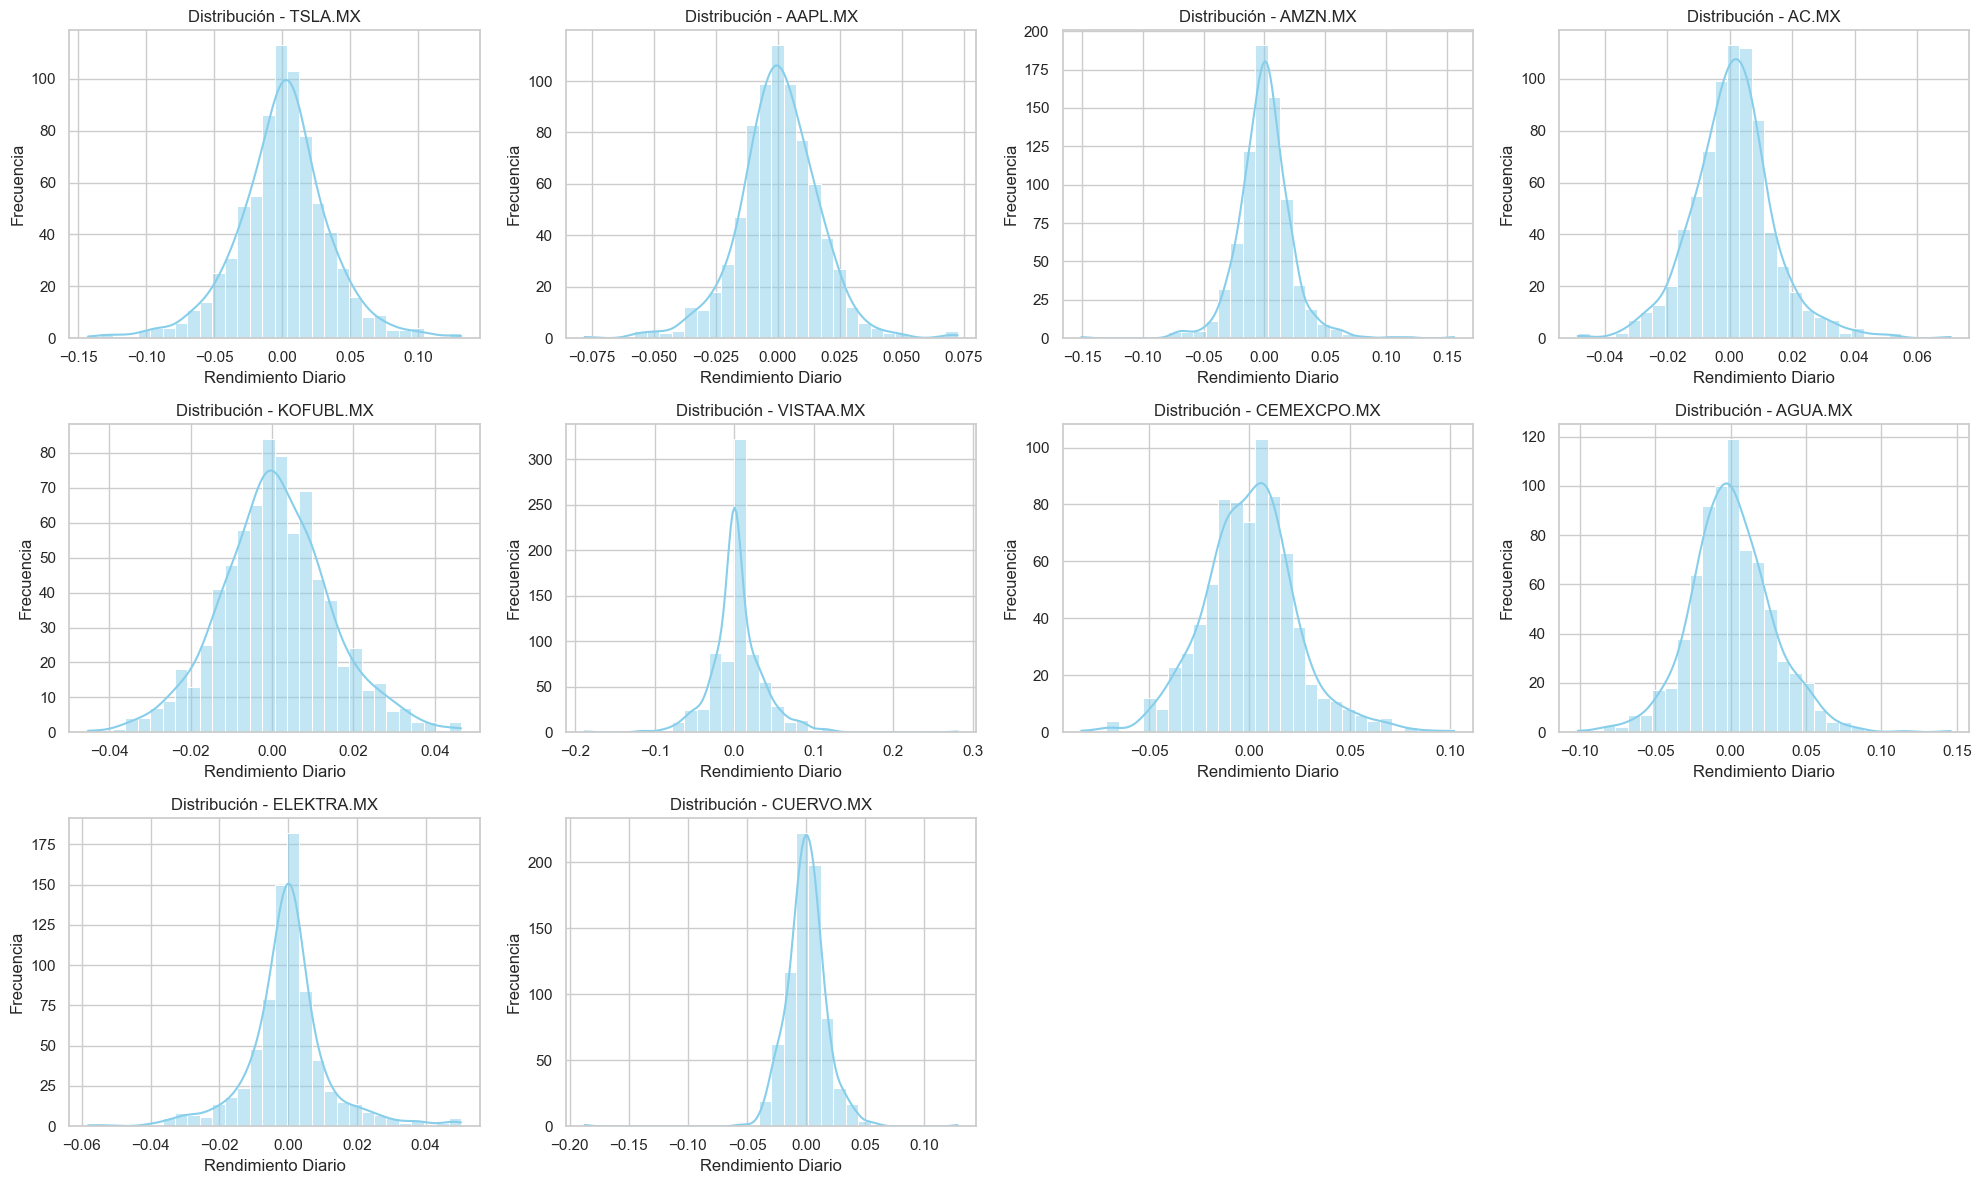

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid")

n_cols = 4
n_rows = math.ceil(len(rendimiento_diario.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Flatten to easily index

for i, columna in enumerate(rendimiento_diario.columns):
    ax = axes[i]
    sns.histplot(rendimiento_diario[columna], bins=30, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribución - {columna}')
    ax.set_xlabel('Rendimiento Diario')
    ax.set_ylabel('Frecuencia')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import shapiro

for col in rendimiento_diario.columns:

    stat, p_value = shapiro(rendimiento_diario[col])

    print(f'Columna: {col}')
    print(f'Estadístico de prueba: {stat}')
    print(f'Valor p: {p_value}')

    alpha = 0.05
    if p_value > alpha:
        print('No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.\n')
    else:
        print('Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.\n')


Columna: TSLA.MX
Estadístico de prueba: 0.9766085237028738
Valor p: 1.2224572439477177e-09
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.

Columna: AAPL.MX
Estadístico de prueba: 0.9762952082831784
Valor p: 1.0008839755581616e-09
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.

Columna: AMZN.MX
Estadístico de prueba: 0.9248617210007828
Valor p: 5.647199675695999e-19
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.

Columna: AC.MX
Estadístico de prueba: 0.9740761402487841
Valor p: 2.538558613804115e-10
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.

Columna: KOFUBL.MX
Estadístico de prueba: 0.9945522859759551
Valor p: 0.00823512314595339
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.

Columna: VISTAA.MX
Estadístico de prueba: 0.8978972293941332
Valor p: 5.238410117482004e-22
Se rechaza la

In [10]:
# Suponiendo 252 días hábiles en un año
rendimiento_anual = rendimiento_diario.sum() / len(rendimiento_diario) * 252

# Desviación estándar de los rendimientos diarios
riesgo_asociado = rendimiento_diario.std()

print("Rendimiento Anual:")
print(rendimiento_anual)
print("\nRiesgo Asociado (Desviación Estándar):")
riesgo_asociado


Rendimiento Anual:
Ticker
TSLA.MX        0.035930
AAPL.MX        0.075676
AMZN.MX        0.041757
AC.MX          0.250719
KOFUBL.MX      0.236283
VISTAA.MX      0.950636
CEMEXCPO.MX    0.085155
AGUA.MX        0.151569
ELEKTRA.MX    -0.039200
CUERVO.MX     -0.004249
dtype: float64

Riesgo Asociado (Desviación Estándar):


Ticker
TSLA.MX        0.034628
AAPL.MX        0.016490
AMZN.MX        0.022608
AC.MX          0.013296
KOFUBL.MX      0.013576
VISTAA.MX      0.033145
CEMEXCPO.MX    0.023312
AGUA.MX        0.027615
ELEKTRA.MX     0.012148
CUERVO.MX      0.017902
dtype: float64

In [11]:
matriz_cov = rendimiento_diario.cov()

print("Matriz de covarianza:")
matriz_cov

Matriz de covarianza:


Ticker,TSLA.MX,AAPL.MX,AMZN.MX,AC.MX,KOFUBL.MX,VISTAA.MX,CEMEXCPO.MX,AGUA.MX,ELEKTRA.MX,CUERVO.MX
Ticker,,,,,,,,,,
TSLA.MX,0.001199,0.000272,0.000305,-0.000010,0.000056,3.620034e-05,0.000169,0.000120,-0.000010,6.774100e-05
AAPL.MX,0.000272,0.000272,0.000199,-0.000002,0.000039,1.716442e-05,0.000099,0.000066,0.000003,4.143856e-05
AMZN.MX,0.000305,0.000199,0.000511,0.000002,0.000028,2.130132e-05,0.000142,0.000087,0.000010,3.509060e-05
AC.MX,-0.000010,-0.000002,0.000002,0.000177,0.000053,-1.575050e-05,0.000058,0.000028,0.000017,2.047163e-05
KOFUBL.MX,0.000056,0.000039,0.000028,0.000053,0.000184,2.901984e-05,0.000088,0.000046,0.000020,1.994708e-05
VISTAA.MX,0.000036,0.000017,0.000021,-0.000016,0.000029,1.098597e-03,0.000005,0.000033,-0.000004,2.510644e-07
CEMEXCPO.MX,0.000169,0.000099,0.000142,0.000058,0.000088,4.951380e-06,0.000543,0.000129,0.000024,6.639312e-05
AGUA.MX,0.000120,0.000066,0.000087,0.000028,0.000046,3.343144e-05,0.000129,0.000763,0.000038,3.941841e-05
ELEKTRA.MX,-0.000010,0.000003,0.000010,0.000017,0.000020,-3.894464e-06,0.000024,0.000038,0.000148,7.149210e-06


In [12]:
matriz_corr = rendimiento_diario.corr()

print("Matriz de correlacion:")
matriz_corr

Matriz de correlacion:


Ticker,TSLA.MX,AAPL.MX,AMZN.MX,AC.MX,KOFUBL.MX,VISTAA.MX,CEMEXCPO.MX,AGUA.MX,ELEKTRA.MX,CUERVO.MX
Ticker,,,,,,,,,,
TSLA.MX,1.000000,0.475911,0.390109,-0.021452,0.119770,0.031541,0.209156,0.125227,-0.022792,0.109275
AAPL.MX,0.475911,1.000000,0.534306,-0.007233,0.173669,0.031404,0.258070,0.144346,0.013998,0.140367
AMZN.MX,0.390109,0.534306,1.000000,0.005799,0.090970,0.028427,0.270069,0.139624,0.034606,0.086702
AC.MX,-0.021452,-0.007233,0.005799,1.000000,0.294347,-0.035740,0.186305,0.075989,0.108134,0.086004
KOFUBL.MX,0.119770,0.173669,0.090970,0.294347,1.000000,0.064493,0.279221,0.123827,0.120193,0.082074
VISTAA.MX,0.031541,0.031404,0.028427,-0.035740,0.064493,1.000000,0.006408,0.036525,-0.009672,0.000423
CEMEXCPO.MX,0.209156,0.258070,0.270069,0.186305,0.279221,0.006408,1.000000,0.200201,0.085858,0.159085
AGUA.MX,0.125227,0.144346,0.139624,0.075989,0.123827,0.036525,0.200201,1.000000,0.114525,0.079733
ELEKTRA.MX,-0.022792,0.013998,0.034606,0.108134,0.120193,-0.009672,0.085858,0.114525,1.000000,0.032873


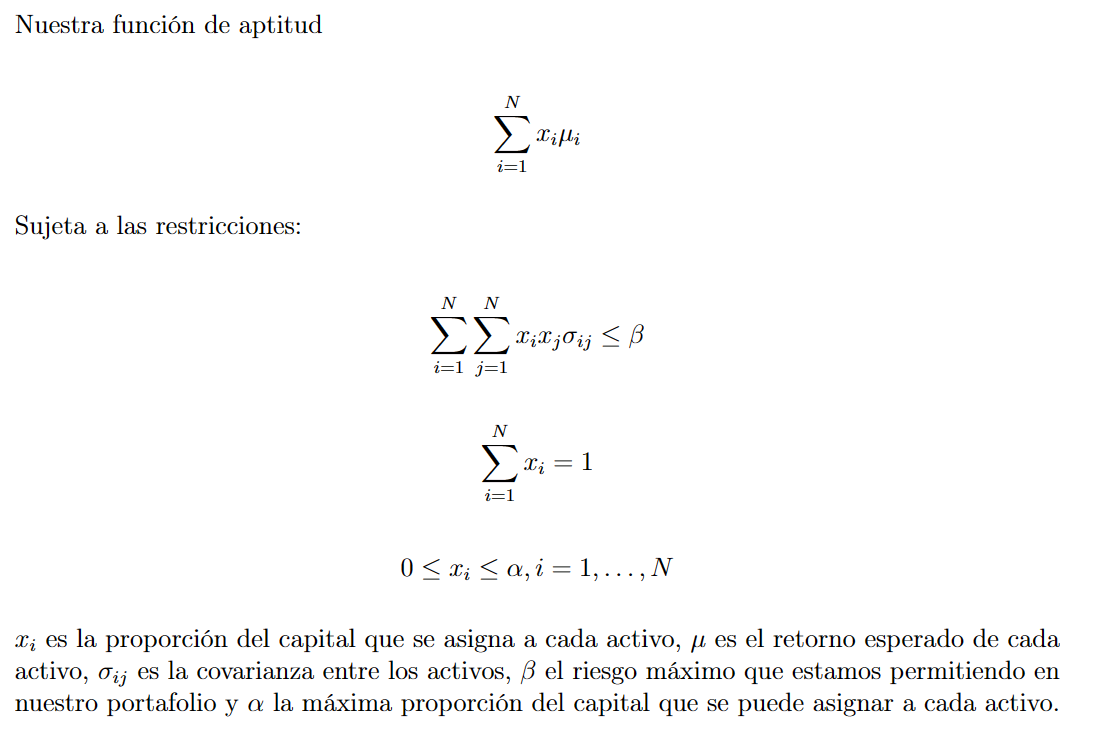

In [13]:
num_cromosomas = 100_000

num_genes = 10

# La maxima proporcion del capital que se puede asignar a cada activo
alpha = 0.3

# El riesgo maximo aceptado para el portafolio
beta = 0.06

poblacion = np.zeros([num_cromosomas, num_genes])

for i in range(num_cromosomas):
    while True:
        cromosoma = np.random.rand(num_genes)

        # Normalizar el cromosoma para que la suma de los genes sea 1
        cromosoma /= np.sum(cromosoma)

        # Calcular la varianza del portafolio
        varianza_portafolio = np.dot(np.dot(cromosoma, matriz_cov), cromosoma.T)

        # Verificar si el cromosoma satisface la restriccion de la maxima
        # proporcion y del maximo riesgo
        if varianza_portafolio <= beta and  np.all(cromosoma <= alpha):
            break

    poblacion[i] = cromosoma

# Vemos los primeros 5 cromosomas y verificamos si la suma de sus genes es 1
for i in range(5):
    cromosoma = poblacion[i]
    print(f"Cromosoma {i+1}: {cromosoma}")
    print(f"Suma de los genes: {np.sum(cromosoma)}\n")


Cromosoma 1: [0.02265241 0.12373145 0.11088143 0.02201308 0.14911963 0.07686864
 0.16221088 0.16501572 0.04842813 0.11907865]
Suma de los genes: 0.9999999999999999

Cromosoma 2: [0.22139479 0.14301466 0.09905768 0.05599154 0.1785531  0.00204392
 0.13600507 0.01146106 0.03573248 0.1167457 ]
Suma de los genes: 1.0

Cromosoma 3: [0.11648283 0.18796065 0.13040235 0.083823   0.13528908 0.04622611
 0.02366254 0.1590335  0.01994917 0.09717076]
Suma de los genes: 0.9999999999999999

Cromosoma 4: [0.04677119 0.15227477 0.18951439 0.0054092  0.13734511 0.13478193
 0.07286451 0.132996   0.05016216 0.07788075]
Suma de los genes: 1.0000000000000002

Cromosoma 5: [0.16571651 0.16937426 0.03188546 0.17794517 0.047759   0.07032797
 0.01106089 0.03529279 0.12120631 0.16943166]
Suma de los genes: 1.0



In [14]:
# Tasa estimada de retorno anual de cada activo
retornos = rendimiento_anual.values

# La función de aptitud
def fitness(cromosoma):
    return np.sum(cromosoma * retornos)

for i in range(5):
    cromosoma = poblacion[i]
    fit = fitness(cromosoma)
    print(f"Retorno esperado del portafolio {i+1}: {fit}")


Retorno esperado del portafolio 1: 0.16505507714112339
Retorno esperado del portafolio 2: 0.09250606472564073
Retorno esperado del portafolio 3: 0.14570600607593007
Retorno esperado del portafolio 4: 0.20712024231154924
Retorno esperado del portafolio 5: 0.14367855896048531


In [15]:
fitness_vals = np.zeros(len(poblacion))
for i, chromosome in enumerate(poblacion):
    fitness_vals[i] = fitness(chromosome)

print(f'max fit: {fitness_vals.max()}')
print(f'cromosoma: {poblacion[np.argmax(fitness_vals)]}')

max fit: 0.3928628627275353
cromosoma: [0.01448856 0.04581089 0.01149896 0.17843243 0.21973352 0.27993699
 0.04517724 0.14774702 0.01077895 0.04639543]


In [16]:
poblacion = np.zeros([num_cromosomas, num_genes])

for i in range(num_cromosomas):
    while True:
        cromosoma = np.random.rand(num_genes)

        # Normalizar el cromosoma para que la suma de los genes sea 1
        cromosoma /= np.sum(cromosoma)

        # Calcular la varianza del portafolio
        varianza_portafolio = np.dot(np.dot(cromosoma, matriz_cov), cromosoma.T)

        # Verificar si el cromosoma satisface la restriccion de la maxima
        # proporcion y del maximo riesgo
        if varianza_portafolio <= beta and  np.all(cromosoma <= alpha):
            break

    poblacion[i] = cromosoma

fitness_vals = np.zeros(len(poblacion))
for i, chromosome in enumerate(poblacion):
    fitness_vals[i] = fitness(chromosome)

print(f'max fit: {fitness_vals.max()}')
print(f'cromosoma: {poblacion[np.argmax(fitness_vals)]}')

max fit: 0.4136342885411051
cromosoma: [0.0519168  0.00204872 0.0457782  0.25134736 0.20320763 0.29977202
 0.00099333 0.09403526 0.01216622 0.03873447]


# Seleccion determinista de activos

## National capitals

In [17]:
import pandas as pd
import yfinance as yf



# Cargar el csv con los nombres de los activos nacionales
assets_NC = pd.read_csv('data/CapitalesNacionales.csv')

# Extraer los nombres
tickers_NC = assets_NC['Tickers'].tolist()

# Definir el rango de tiempo a considerar en los datos historicos
start = '2021-01-01'
end = '2024-04-05'

# Descargar los precios de cierre ajustados de Yahoo Finance
data_NC = yf.download(tickers_NC, start=start, end=end)['Close'][tickers_NC]

data_NC.head()


C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\2367658622.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_NC = yf.download(tickers_NC, start=start, end=end)['Close'][tickers_NC]
[**********************75%***********            ]  82 of 110 completedHTTP Error 404: 
[*********************100%***********************]  110 of 110 completed

1 Failed download:
['LASITEB-1.MX']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,AC.MX,ACTINVRB.MX,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,ALTERNAB.MX,AMXB.MX,ANB.MX,ANGELD10.MX,...,TRAXIONA.MX,UDITRACISHRS.MX,VASCONI.MX,VESTA.MX,VINTE.MX,VISTAA.MX,VITROA.MX,VMEX19.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,77.187370,7.716552,24.446508,13.086114,17.521797,25.897888,NaN,12.910333,1420.494507,15.050000,...,17.200001,116.459946,24.865711,39.257145,26.631716,54.000000,31.504225,NaN,23.889999,52.461926
2021-01-05,78.880539,7.637408,22.973000,13.004270,17.728052,25.770023,NaN,12.910333,1420.494507,15.050000,...,17.150000,117.028976,24.865711,38.507515,26.631716,54.000000,30.785954,31.858496,23.510000,53.140385
2021-01-06,79.529861,7.637408,23.507254,13.031552,17.993237,26.124113,NaN,12.910333,1420.494507,15.440000,...,17.139999,117.121025,24.865711,39.178246,26.631716,54.000000,29.937990,32.538464,24.190001,54.836552
2021-01-07,82.480591,7.637408,24.101826,13.058833,18.012877,26.291325,NaN,13.340677,1420.494507,15.680000,...,17.049999,116.978760,24.865711,39.513607,26.631716,56.610001,29.937990,32.868446,23.900000,53.828018
2021-01-08,82.061424,7.637408,23.240126,12.913330,18.160202,26.419191,NaN,13.340677,1408.532593,16.110001,...,17.190001,117.104301,24.865711,41.298912,26.622372,56.500000,30.257225,33.438419,23.879999,55.698391


In [18]:
# Calcular la cantidad de valores NaN en cada activo
nan_counts_NC = data_NC.isna().sum()

# Seleccionar las activos con al menos un valor NaN
nan_columns_NC = nan_counts_NC[nan_counts_NC > 0]

print("NaNs por Activo:")

nan_columns_NC

NaNs por Activo:


Ticker
ACTINVRB.MX        236
ALTERNAB.MX        103
ANGELD10.MX          3
CETETRCISHRS.MX     18
CHNTRAC11.MX       752
CTAXTELA.MX        605
DIABLOI10.MX         2
FIBRATC14.MX       207
GAVA.MX            267
GENIUS21.MX         52
IVVPESOISHRS.MX     12
LASITEB-1.MX       820
M10TRACISHRS.MX    160
M5TRACISHRS.MX     393
MEXTRAC09.MX       217
QVGMEX18.MX         34
SITES1A-1.MX       303
SMARTRC14.MX       809
SRE.MX             617
UDITRACISHRS.MX    104
VMEX19.MX          168
dtype: int64

In [19]:
# Guardar en un dataframe los activos con 10 o menos valores NaN
filtered_data_NC = data_NC.dropna(axis=1, thresh=data_NC.shape[0]-10)

# Calcular la cantidad de valores NaN por activo de ese nuevo dataframe
nan_counts_NC = filtered_data_NC.isna().sum()

# Seleccionar los activos con al menos un valor NaN
nan_columns_NC = nan_counts_NC[nan_counts_NC > 0]

print("Activos con valores NaN y su cantidad despues del filtrado:")
nan_columns_NC

Activos con valores NaN y su cantidad despues del filtrado:


Ticker
ANGELD10.MX     3
DIABLOI10.MX    2
dtype: int64

In [20]:
# Rellenar las celdas NaN con el valor anterior (si existe)
data_filled_forward_NC = filtered_data_NC.ffill(axis=0)

# Rellenar las celdas NaN con el valor posterior (si existe)
data_filled_backward_NC = data_filled_forward_NC.bfill(axis=0)

# Verificamos de nuevo la cantidad de valores NaN por activo
nan_counts_NC_ = data_filled_backward_NC.isna().sum()

# Seleccionamos los activos con al menos un valor NaN
nan_columns_NC_ = nan_counts_NC_[nan_counts_NC_ > 0]

print("Activos con valores NaN y su cantidad despues del filtrado:")
nan_columns_NC_

Activos con valores NaN y su cantidad despues del filtrado:


Series([], dtype: int64)

In [21]:
# Calculamos el rendimiento diario
daily_return_NC = data_filled_backward_NC.pct_change()

CP_NC = data_filled_backward_NC

# Eliminamos la primera fila (NaN)
daily_return_NC = daily_return_NC.dropna()

daily_return_NC.head()

Ticker,AC.MX,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXB.MX,ANB.MX,ANGELD10.MX,ARA.MX,ASURB.MX,...,TLEVISACPO.MX,TMMA.MX,TRAXIONA.MX,VASCONI.MX,VESTA.MX,VINTE.MX,VISTAA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.021936,-0.060275,-0.006254,0.011771,-0.004937,0.000000,0.000000,0.000000,-0.007653,0.007013,...,0.032171,-0.005000,-0.002907,0.0,-0.019095,0.000000,0.000000,-0.022799,-0.015906,0.012932
2021-01-06,0.008232,0.023256,0.002098,0.014958,0.013740,0.000000,0.000000,0.025914,-0.030848,0.059872,...,0.017477,-0.037688,-0.000583,0.0,0.017418,0.000000,0.000000,-0.027544,0.028924,0.031919
2021-01-07,0.037102,0.025293,0.002093,0.001092,0.006401,0.033333,0.000000,0.015544,-0.013263,-0.016327,...,0.046092,0.013055,-0.005251,0.0,0.008560,0.000000,0.048333,0.000000,-0.011988,-0.018392
2021-01-08,-0.005082,-0.035752,-0.011142,0.008179,0.004863,0.000000,-0.008421,0.027423,-0.005376,0.006072,...,0.019157,0.028350,0.008211,0.0,0.045182,-0.000351,-0.001943,0.010663,-0.000837,0.034747
2021-01-11,0.012019,-0.028179,-0.023239,0.000541,-0.026433,-0.007097,0.000000,-0.015518,0.010811,-0.006754,...,-0.012084,-0.007519,0.000000,0.0,-0.023644,0.000351,0.000000,-0.006265,-0.023451,0.002798


### Numero de activos a considerar

In [22]:
# Calcular el retorno anual promedio de cada activo
average_return_NationalCapitals = daily_return_NC.mean()* 252

# Calcular la desviación estándar (riesgo) de cada activo
risk_NationalCapitals = daily_return_NC.std()

# Calcular la proporcion entre el retorno y el riesgo de cada activo
weightings_NC = average_return_NationalCapitals / risk_NationalCapitals

# Ordenar las ponderaciones de los activos de mayor a menor
ordered_weightings_NC = weightings_NC.sort_values(ascending=False)

# Guardar los 15 activos con la mejor porporcion
TopWeightings_NationalCapitals = ordered_weightings_NC.head(15)

print("Capitales Nacionales con la mayor ponderacion:")

TopWeightings_NationalCapitals

Capitales Nacionales con la mayor ponderacion:


Ticker
CHDRAUIB.MX      30.533358
LAMOSA.MX        29.922173
VISTAA.MX        27.913815
BAFARB.MX        24.591972
GPROFUT.MX       23.814820
PSOTRAC15.MX     22.536592
BBAJIOO.MX       22.288680
FRAGUAB.MX       20.984664
ALSEA.MX         20.428416
AC.MX            19.126086
LIVEPOL1.MX      18.766519
GENTERA.MX       18.669514
LIVEPOLC-1.MX    18.606501
CIEB.MX          18.532940
CMOCTEZ.MX       17.235592
dtype: float64

In [23]:
# Obtener los precios de cierre de los activos seleccionados
closing_prices_NC = CP_NC[TopWeightings_NationalCapitals.index]
closing_prices_NC

Ticker,CHDRAUIB.MX,LAMOSA.MX,VISTAA.MX,BAFARB.MX,GPROFUT.MX,PSOTRAC15.MX,BBAJIOO.MX,FRAGUAB.MX,ALSEA.MX,AC.MX,LIVEPOL1.MX,GENTERA.MX,LIVEPOLC-1.MX,CIEB.MX,CMOCTEZ.MX
Date,,,,,,,,,,,,,,,
2021-01-04,27.889505,34.710777,54.000000,37.693436,35.405422,7.88,16.673229,236.736938,25.897888,77.187370,66.395111,8.021358,61.833256,5.171319,42.732922
2021-01-05,27.262568,34.655079,54.000000,37.693436,35.405422,7.83,16.660570,231.495529,25.770023,78.880539,66.395111,7.799492,61.842125,4.987820,42.509193
2021-01-06,27.832512,34.655079,54.000000,37.693436,35.405422,7.95,16.755486,231.495529,26.124113,79.529861,66.395111,7.850690,62.347282,5.004501,43.254974
2021-01-07,28.022497,34.655079,56.610001,37.693436,35.405422,7.85,16.825089,221.300980,26.291325,82.480591,66.395111,8.251760,62.639744,5.004501,43.254974
2021-01-08,29.086401,34.655079,56.500000,37.693436,35.405422,7.83,16.938988,221.056396,26.419191,82.061424,66.395111,8.115225,62.577717,5.004501,43.254974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,131.674042,125.956718,691.000000,120.000000,86.636246,13.22,56.007126,645.385925,80.605087,169.021164,144.511108,26.579659,138.644577,22.588821,66.966415
2024-04-01,131.624939,124.987816,695.000000,120.000000,86.636246,13.22,55.504208,654.947144,81.342773,167.440033,144.511108,25.840557,142.749496,22.588821,67.533691
2024-04-02,129.719315,124.987816,681.979980,120.000000,86.636246,13.22,55.582245,669.289062,81.067375,168.221298,144.511108,25.906048,142.922531,22.588821,67.533691


In [24]:
# Obtener el retorno pormedio anual de los activos con la mejor ponderacion
MeanReturn_NationalCapitals = \
           average_return_NationalCapitals[TopWeightings_NationalCapitals.index]
MeanReturn_NationalCapitals

Ticker
CHDRAUIB.MX      0.502305
LAMOSA.MX        0.418857
VISTAA.MX        0.914456
BAFARB.MX        0.387490
GPROFUT.MX       0.294088
PSOTRAC15.MX     0.166068
BBAJIOO.MX       0.418751
FRAGUAB.MX       0.356001
ALSEA.MX         0.382220
AC.MX            0.256323
LIVEPOL1.MX      0.263872
GENTERA.MX       0.428172
LIVEPOLC-1.MX    0.282443
CIEB.MX          0.549310
CMOCTEZ.MX       0.150320
dtype: float64

In [25]:
# Dataframe con los retornos diarios de los activos seleccionados
daily_return_NationalCapital = daily_return_NC[MeanReturn_NationalCapitals.index]
daily_return_NationalCapital

Ticker,CHDRAUIB.MX,LAMOSA.MX,VISTAA.MX,BAFARB.MX,GPROFUT.MX,PSOTRAC15.MX,BBAJIOO.MX,FRAGUAB.MX,ALSEA.MX,AC.MX,LIVEPOL1.MX,GENTERA.MX,LIVEPOLC-1.MX,CIEB.MX,CMOCTEZ.MX
Date,,,,,,,,,,,,,,,
2021-01-05,-0.022479,-0.001605,0.000000,0.0,0.0,-0.006345,-0.000759,-0.022140,-0.004937,0.021936,0.0,-0.027659,0.000143,-0.035484,-0.005235
2021-01-06,0.020906,0.000000,0.000000,0.0,0.0,0.015326,0.005697,0.000000,0.013740,0.008232,0.0,0.006564,0.008169,0.003344,0.017544
2021-01-07,0.006826,0.000000,0.048333,0.0,0.0,-0.012579,0.004154,-0.044038,0.006401,0.037102,0.0,0.051087,0.004691,0.000000,0.000000
2021-01-08,0.037966,0.000000,-0.001943,0.0,0.0,-0.002548,0.006770,-0.001105,0.004863,-0.005082,0.0,-0.016546,-0.000990,0.000000,0.000000
2021-01-11,-0.015350,0.000000,0.000000,0.0,0.0,0.003576,-0.008218,0.000000,-0.026433,0.012019,0.0,-0.007361,-0.000708,-0.022222,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,0.007819,0.000000,0.000000,0.0,0.0,0.000000,0.015087,0.016260,-0.005461,-0.010670,0.0,0.041422,-0.005722,0.000000,-0.008400
2024-04-01,-0.000373,-0.007692,0.005789,0.0,0.0,0.000000,-0.008980,0.014815,0.009152,-0.009355,0.0,-0.027807,0.029608,0.000000,0.008471
2024-04-02,-0.014478,0.000000,-0.018734,0.0,0.0,0.000000,0.001406,0.021898,-0.003386,0.004666,0.0,0.002534,0.001212,0.000000,0.000000


## FIBRAS

In [26]:
# Cargar el csv con los nombres de las FIBRAS
path = 'data/FIBRAS.csv'
assets_F = pd.read_csv(path)

# Extraer los nombres
tickers_F = assets_F['Tickers'].tolist()

# Definir el rango de tiempo a considerar en los datos historicos
start = '2021-01-01'
end = '2024-04-05'

# Descargar los precios de cierre ajustados de Yahoo Finance
data_FIBRAS = yf.download(tickers_F, start=start,
                          end=end)['Close'][tickers_F]

data_FIBRAS

C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\2859717432.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_FIBRAS = yf.download(tickers_F, start=start,
[*********************100%***********************]  21 of 21 completed


Ticker,DANHOS13.MX,EDUCA18.MX,FCFE18.MX,FEXI21.MX,FHIPO14.MX,FIBRAHD15.MX,FIBRAMQ12.MX,FIBRAPL14.MX,FIBRAUP18.MX,FIHO12.MX,...,FMTY14.MX,FMX23.MX,FNOVA17.MX,FPLUS16.MX,FSHOP13.MX,FUNO11.MX,FVIA16.MX,SOMA21.MX,STORAGE18.MX,TERRA13.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,17.123453,NaN,NaN,NaN,13.434310,4.458219,20.077646,40.619328,NaN,3.909803,...,8.067361,NaN,12.590987,10.515889,6.354671,15.583100,21.630484,NaN,NaN,23.775684
2021-01-05,17.197933,NaN,NaN,NaN,13.511628,4.458219,19.522219,39.133255,NaN,4.017413,...,8.136908,NaN,12.590987,10.180171,6.061379,15.548797,21.630484,NaN,NaN,23.331993
2021-01-06,17.468765,NaN,NaN,NaN,13.131473,4.481320,19.535933,39.327858,NaN,3.990510,...,8.164723,NaN,12.590987,10.466519,6.102114,16.063427,21.630484,NaN,NaN,23.745085
2021-01-07,17.448454,NaN,NaN,NaN,13.131473,4.481320,20.722216,39.619766,NaN,4.107087,...,8.227318,NaN,12.754332,10.180171,6.110261,16.049704,21.630484,NaN,NaN,23.936335
2021-01-08,17.570328,NaN,NaN,NaN,13.414980,4.481320,20.811357,39.221718,NaN,4.205729,...,8.129952,NaN,12.590987,10.367778,6.102114,16.221251,21.630484,NaN,NaN,23.936335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,18.613701,52.276249,44.294971,19.877783,14.445306,2.090313,29.549973,68.952888,24.92,9.204214,...,10.321750,NaN,26.061489,8.100000,5.805929,25.450161,22.550888,45.0,16.919094,44.321560
2024-04-01,18.567743,52.276249,44.294971,19.867844,14.445306,2.090313,30.081253,68.467979,24.92,9.232106,...,10.258371,NaN,26.070570,8.100000,5.815263,25.945944,22.550888,45.0,16.584536,44.243359
2024-04-02,18.650473,52.276249,44.294971,19.877783,14.499207,2.090313,30.411009,68.734200,25.91,9.204214,...,10.194993,NaN,26.052420,8.190000,5.777926,25.459343,22.550888,NaN,NaN,43.432003


In [27]:
# Calcular la cantidad de valores NaN en cada FIBRA
nan_counts_F = data_FIBRAS.isna().sum()

# Seleccionar las FIBRAS con al menos un valor NaN
nan_columns_F = nan_counts_F[nan_counts_F > 0]

print("FIBRAS con valores NaN y su cantidad:")
nan_columns_F


FIBRAS con valores NaN y su cantidad:


Ticker
EDUCA18.MX      219
FCFE18.MX       635
FEXI21.MX       480
FIBRAUP18.MX    241
FMX23.MX        781
SOMA21.MX       786
STORAGE18.MX    505
dtype: int64

In [28]:
# Guardar en un dataframe las FIBRAS con 10 o menos valores NaN
filtered_data_FIBRAS = data_FIBRAS.dropna(axis=1, thresh=data_NC.shape[0]-10)

# Calcular la cantidad de valores NaN por FIBRA en el nuevo dataframe
nan_counts_F_ = filtered_data_FIBRAS.isna().sum()

# Seleccionar las FIBRAS con al menos un valor NaN
nan_columns_F_ = nan_counts_F_[nan_counts_F_ > 0]

print("FIBRAS con valores NaN y su cantidad despues del filtrado:")
nan_columns_F_

FIBRAS con valores NaN y su cantidad despues del filtrado:


Series([], dtype: int64)

In [29]:
# Calculamos el rendimiento diario
daily_return_F = filtered_data_FIBRAS.pct_change()

CP_FIBRAS = filtered_data_FIBRAS

# Eliminamos la primera fila (NaN)
daily_return_F = daily_return_F.dropna()

daily_return_F

Ticker,DANHOS13.MX,FHIPO14.MX,FIBRAHD15.MX,FIBRAMQ12.MX,FIBRAPL14.MX,FIHO12.MX,FINN13.MX,FMTY14.MX,FNOVA17.MX,FPLUS16.MX,FSHOP13.MX,FUNO11.MX,FVIA16.MX,TERRA13.MX
Date,,,,,,,,,,,,,,
2021-01-05,0.004350,0.005755,0.000000,-0.027664,-0.036585,0.027523,0.026316,0.008621,0.000000,-0.031925,-0.046154,-0.002201,0.0,-0.018662
2021-01-06,0.015748,-0.028135,0.005182,0.000702,0.004973,-0.006697,0.006993,0.003418,0.000000,0.028128,0.006720,0.033098,0.0,0.017705
2021-01-07,-0.001163,0.000000,0.000000,0.060723,0.007422,0.029213,0.002315,0.007666,0.012973,-0.027359,0.001335,-0.000854,0.0,0.008054
2021-01-08,0.006985,0.021590,0.000000,0.004302,-0.010047,0.024017,-0.006929,-0.011834,-0.012807,0.018429,-0.001333,0.010688,0.0,0.000000
2021-01-11,-0.000385,0.000000,0.027944,-0.053377,-0.001353,0.014926,-0.006976,-0.002567,0.000000,-0.009524,-0.021362,-0.001692,0.0,-0.006072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,-0.016513,-0.001242,0.000000,0.000620,0.033048,0.000000,0.043716,0.000000,-0.001392,0.002475,0.003226,-0.002519,0.0,0.000883
2024-04-01,-0.002469,0.000000,0.000000,0.017979,-0.007032,0.003030,0.019197,-0.006140,0.000348,0.000000,0.001608,0.019481,0.0,-0.001764
2024-04-02,0.004456,0.003731,0.000000,0.010962,0.003888,-0.003021,0.000000,-0.006178,-0.000696,0.011111,-0.006420,-0.018754,0.0,-0.018338


### Numero de activos a considerar

In [30]:
# Calcular el retorno anual promedio de cada FIBRA
average_return_FIBRAS = daily_return_F.mean() * 252

# Calcular la desviación estándar (riesgo) de cada FIBRA
risk_FIBRAS = daily_return_F.std()

# Calcular la proporcion entre el retorno y el riesgo de cada FIBRA
weightings_F = average_return_FIBRAS / risk_FIBRAS

# Ordenar las ponderaciones de las FIBRAS de mayor a menor
ordered_weightings_F = weightings_F.sort_values(ascending=False)

# Guardar las 14 FIBRAS con la mejor porporcion (solo son 14,
# si queremos quedarnos con menos FIBRAS podemos agrgear .head(4), por ejemplo,
# para seleccionar las primeras 4)
TopWeightings_FIBRAS = ordered_weightings_F.head(6)

print("FIBRAS con la mayor ponderacion:")

TopWeightings_FIBRAS

FIBRAS con la mayor ponderacion:


Ticker
FNOVA17.MX      20.528716
FIHO12.MX       15.112602
TERRA13.MX      13.093701
FUNO11.MX       11.265175
FIBRAPL14.MX    10.584517
FIBRAMQ12.MX     9.099069
dtype: float64

In [31]:
# Obtener los precios de cierre de los activos seleccionados
closing_prices_FIBRAS = CP_FIBRAS[TopWeightings_FIBRAS.index]
closing_prices_FIBRAS

Ticker,FNOVA17.MX,FIHO12.MX,TERRA13.MX,FUNO11.MX,FIBRAPL14.MX,FIBRAMQ12.MX
Date,,,,,,
2021-01-04,12.590987,3.909803,23.775684,15.583100,40.619328,20.077646
2021-01-05,12.590987,4.017413,23.331993,15.548797,39.133255,19.522219
2021-01-06,12.590987,3.990510,23.745085,16.063427,39.327858,19.535933
2021-01-07,12.754332,4.107087,23.936335,16.049704,39.619766,20.722216
2021-01-08,12.590987,4.205729,23.936335,16.221251,39.221718,20.811357
...,...,...,...,...,...,...
2024-03-27,26.061489,9.204214,44.321560,25.450161,68.952888,29.549973
2024-04-01,26.070570,9.232106,44.243359,25.945944,68.467979,30.081253
2024-04-02,26.052420,9.204214,43.432003,25.459343,68.734200,30.411009


In [32]:
# Obtener el retorno pormedio anual de las Fibras con la mejor ponderacion
MeanReturn_FIBRAS = average_return_FIBRAS[TopWeightings_FIBRAS.index]
MeanReturn_FIBRAS

Ticker
FNOVA17.MX      0.241240
FIHO12.MX       0.318168
TERRA13.MX      0.211706
FUNO11.MX       0.194757
FIBRAPL14.MX    0.191587
FIBRAMQ12.MX    0.156553
dtype: float64

In [33]:
# Dataframe con los retornos diarios de las fibras seleccionadas
daily_return_FIBRAS = daily_return_F[MeanReturn_FIBRAS.index]
daily_return_FIBRAS

Ticker,FNOVA17.MX,FIHO12.MX,TERRA13.MX,FUNO11.MX,FIBRAPL14.MX,FIBRAMQ12.MX
Date,,,,,,
2021-01-05,0.000000,0.027523,-0.018662,-0.002201,-0.036585,-0.027664
2021-01-06,0.000000,-0.006697,0.017705,0.033098,0.004973,0.000702
2021-01-07,0.012973,0.029213,0.008054,-0.000854,0.007422,0.060723
2021-01-08,-0.012807,0.024017,0.000000,0.010688,-0.010047,0.004302
2021-01-11,0.000000,0.014926,-0.006072,-0.001692,-0.001353,-0.053377
...,...,...,...,...,...,...
2024-03-27,-0.001392,0.000000,0.000883,-0.002519,0.033048,0.000620
2024-04-01,0.000348,0.003030,-0.001764,0.019481,-0.007032,0.017979
2024-04-02,-0.000696,-0.003021,-0.018338,-0.018754,0.003888,0.010962


## International Capitals

In [34]:
# Cargar el csv con los nombres de los activos internacionales
path = 'data/CapitalesExtranjeros.csv'
assets_IC = pd.read_csv(path)

# Extraer los nombres
tickers_IC = assets_IC['Tickers'].tolist()

# Definir el rango de tiempo a considerar en los datos historicos
start = '2021-01-01'
end = '2024-04-05'

# Descargar los precios de cierre ajustados de Yahoo Finance
data_IC = yf.download(tickers_IC, start=start, end=end)['Close'][tickers_IC]

data_IC

C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\4193960480.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_IC = yf.download(tickers_IC, start=start, end=end)['Close'][tickers_IC]
[**                     4%                       ]  23 of 541 completedHTTP Error 404: 
[*********************100%***********************]  541 of 541 completed

22 Failed downloads:
['BLUE.MX', 'MRO.MX', 'MTTR.MX']: YFTzMissingError('possibly delisted; no timezone found')
['SNSR.MX', 'VGIT.MX', 'ESGU.MX', 'FLGR.MX', 'SQ.MX', 'DRIV.MX', 'IBLC.MX', 'EMXC1.MX', 'NRSH.MX', 'FLJP.MX', 'FLMX.MX', 'XSOE.MX', 'FLAX.MX', 'MB3MN.MX', 'PAVE.MX', 'SOLV.MX', 'XLRE.MX', 'MILN.MX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-01 -> 2024-04-05) (Yahoo error = "Data doesn\'t exist for startDate = 1609480800, endDate = 1712296800")')
['CWEB.MX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-01 -> 2024-04-05)')


Ticker,1810N.MX,AA1.MX,AAAU.MX,AAL.MX,AAPL.MX,AAXJ.MX,ABBV.MX,ABEVN.MX,ABNB.MX,ACNN.MX,...,XPEVN.MX,XPH.MX,XRT.MX,XSOE.MX,YANG.MX,YINN.MX,YODAN.MX,ZM.MX,ZPR1N.MX,ZS.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,135.009995,461.040527,NaN,303.299988,2581.763428,1685.407471,2079.525391,57.198505,NaN,NaN,...,NaN,940.326538,1049.260864,NaN,NaN,7432.242188,NaN,7170.000000,101.216171,4000.000000
2021-01-05,104.470001,477.007263,NaN,307.589996,2601.776611,1685.407471,2090.423340,55.965370,NaN,NaN,...,NaN,940.326538,1049.260864,NaN,NaN,7896.756348,NaN,7168.709961,101.215668,4000.000000
2021-01-06,137.419998,501.426483,NaN,303.600006,2489.302734,1723.134766,2090.423340,58.811069,NaN,NaN,...,NaN,940.326538,1049.260864,NaN,NaN,7618.048828,NaN,6762.870117,101.214607,3729.639893
2021-01-07,120.000000,506.495880,NaN,309.839996,2626.893799,1740.377441,2120.144531,58.811069,NaN,NaN,...,NaN,940.326538,1049.260864,NaN,NaN,7971.080078,NaN,6873.890137,101.214813,3729.639893
2021-01-08,140.000000,496.077576,NaN,303.420013,2634.554688,1797.736328,2120.144531,NaN,NaN,NaN,...,NaN,1012.953125,1049.260864,NaN,NaN,8357.556641,NaN,6971.839844,101.215912,3960.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,31.889999,540.591248,NaN,253.000000,2873.515869,1102.111816,2973.616943,41.140308,2742.000000,5650.000000,...,129.419998,658.463867,1260.118164,NaN,NaN,297.527924,NaN,1100.000000,109.031540,3257.800049
2024-04-01,34.299999,540.591248,NaN,252.929993,2826.311035,1102.111816,2992.511475,40.148975,2720.000000,NaN,...,127.620003,658.463867,1260.118164,NaN,3669.735840,322.068634,NaN,1075.000000,NaN,3178.000000
2024-04-02,37.700001,590.323730,NaN,243.949997,2798.889648,1102.111816,2972.858887,39.901142,2652.199951,5535.669922,...,123.699997,658.463867,1260.118164,NaN,3581.189697,328.313385,NaN,1075.000000,109.127373,3100.000000


In [35]:
# Calcular la cantidad de valores NaN en cada activo
nan_counts_IC = data_IC.isna().sum()

# Seleccionar las activos con al menos un valor NaN
nan_columns_IC = nan_counts_IC[nan_counts_IC > 0]

print("Activos con valores NaN y su cantidad:")
nan_columns_IC

Activos con valores NaN y su cantidad:


Ticker
1810N.MX    192
AAAU.MX     812
ABEVN.MX    396
ABNB.MX      48
ACNN.MX     614
           ... 
XSOE.MX     820
YANG.MX     278
YINN.MX      14
YODAN.MX    817
ZPR1N.MX     12
Length: 254, dtype: int64

In [36]:
# Guardar en un dataframe los activos con 10 o menos valores NaN
filtered_data_IC = data_IC.dropna(axis=1, thresh=data_NC.shape[0]-10)

# Calcular la cantidad de valores NaN por activo en el nuevo dataframe
nan_counts__IC = filtered_data_IC.isna().sum()

# Seleccionar los activos con al menos un valor NaN
nan_columns__IC = nan_counts__IC[nan_counts__IC > 0]

print("Activos con valores NaN y su cantidad despues del filtrado:")
nan_columns__IC

Activos con valores NaN y su cantidad despues del filtrado:


Ticker
BABAN.MX    1
LIT.MX      7
NION.MX     1
SOXL.MX     7
SOXS.MX     5
SPXL.MX     5
SPXS.MX     7
dtype: int64

In [37]:
# Rellenar las celdas NaN con el valor anterior (si existe)
data_filled_forward_IC = filtered_data_IC.fillna(method='ffill', axis=0)

# Rellenar las celdas NaN con el valor posterior (si existe)
data_filled_backward_IC = data_filled_forward_IC.fillna(method='bfill', axis=0)

# Verificamos de nuevo la cantidad de valores NaN por activo
nan_counts_IC_ = data_filled_backward_IC.isna().sum()

# Seleccionamos los activos con al menos un valor NaN
nan_columns_IC_ = nan_counts_IC_[nan_counts_IC_ > 0]

print("Activos con valores NaN y su cantidad despues del filtrado:")
nan_columns_IC_

Activos con valores NaN y su cantidad despues del filtrado:


C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\2588104499.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_forward_IC = filtered_data_IC.fillna(method='ffill', axis=0)
C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\2588104499.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_backward_IC = data_filled_forward_IC.fillna(method='bfill', axis=0)


Series([], dtype: int64)

In [38]:
# Calculamos el rendimiento diario
daily_return_IC = data_filled_backward_IC.pct_change()

CP_IC = data_filled_backward_IC

# Eliminamos la primera fila (NaN)
daily_return_IC = daily_return_IC.dropna()

daily_return_IC

Ticker,AA1.MX,AAL.MX,AAPL.MX,AAXJ.MX,ABBV.MX,ACWI.MX,ADBE.MX,ADPN.MX,ADSK.MX,AGG.MX,...,XLI.MX,XLK.MX,XLP.MX,XLV.MX,XLY.MX,XOM.MX,XPH.MX,XRT.MX,ZM.MX,ZS.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.034632,0.014144,0.007752,0.000000,0.005241,0.005825,0.005741,0.0,-0.001835,0.000000,...,0.007387,0.002742,0.003019,0.002025,0.000000,0.063368,0.000000,0.0,-0.000180,0.000000
2021-01-06,0.051193,-0.012972,-0.043230,0.022385,0.000000,-0.005945,-0.045044,0.0,0.015038,-0.017201,...,0.012875,-0.025067,-0.010534,0.001362,0.006309,-0.004654,0.000000,0.0,-0.056613,-0.067590
2021-01-07,0.010110,0.020553,0.055273,0.010007,0.014218,0.031753,0.036409,0.0,0.028807,0.005402,...,0.026050,0.000000,0.009734,0.040000,0.030407,0.029764,0.000000,0.0,0.016416,0.000000
2021-01-08,-0.020569,-0.020720,0.002916,0.032958,0.000000,0.004307,0.014734,0.0,0.000000,0.007999,...,-0.007222,0.042784,0.004037,0.001026,0.023608,0.015504,0.077235,0.0,0.014250,0.061765
2021-01-11,-0.006256,-0.008964,-0.019219,-0.003691,0.027566,-0.002613,-0.018240,0.0,0.000000,0.000000,...,0.006128,-0.000423,-0.003143,0.010289,-0.012661,0.027263,0.000000,0.0,-0.028589,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,0.034417,0.012000,0.014252,0.000000,0.000000,-0.006308,-0.017710,0.0,0.000000,-0.002827,...,0.000000,-0.014060,0.001010,0.008895,-0.000066,0.000058,-0.082537,0.0,-0.007507,0.000000
2024-04-01,0.000000,-0.000277,-0.016428,0.000000,0.006354,0.006535,0.000373,0.0,0.000000,0.002986,...,0.000000,0.010477,0.000000,-0.000902,0.000000,0.029008,0.000000,0.0,-0.022727,-0.024495
2024-04-02,0.091996,-0.035504,-0.009702,0.000000,-0.006567,-0.011821,-0.006398,0.0,0.000000,-0.010322,...,-0.006574,-0.016417,-0.007173,-0.023109,-0.014455,0.010420,0.000000,0.0,0.000000,-0.024544


### Numero de activos a considerar

In [39]:
# Calcular el retorno promedio de cada activo
average_return_InternationalCapitals = daily_return_IC.mean()* 252

# Calcular la desviación estándar (riesgo) de cada activo
risk_InternationalCapitals = daily_return_IC.std()

# Calcular la proporcion entre el retorno y el riesgo de cada activo
weightings_IC = average_return_InternationalCapitals/risk_InternationalCapitals

# Ordenar las ponderaciones de los activos de mayor a menor
ordered_weightings_IC = weightings_IC.sort_values(ascending=False)

# Guardar los 15 activos con la mejor porporcion
TopWeightings_InternationalCapitals = ordered_weightings_IC.head(16)

print("Capitales internacionales con la mayor ponderacion:")

TopWeightings_InternationalCapitals

Capitales internacionales con la mayor ponderacion:


Ticker
LLY.MX      24.500481
NVDA.MX     20.369436
DELLC.MX    18.615021
STLD.MX     17.773131
ORLY.MX     17.257585
XLE.MX      16.726592
COP.MX      16.097625
XOM.MX      15.578899
AZO.MX      15.346208
MLM.MX      14.738667
VLO.MX      14.652324
DXJ.MX      14.362736
DVN.MX      14.157773
FTNT.MX     12.159422
ITB.MX      12.086939
BRKB.MX     11.910630
dtype: float64

In [40]:
# Obtener los precios de cierre de los activos seleccionados
closing_prices_IC = CP_IC[TopWeightings_InternationalCapitals.index]
closing_prices_IC

Ticker,LLY.MX,NVDA.MX,DELLC.MX,STLD.MX,ORLY.MX,XLE.MX,COP.MX,XOM.MX,AZO.MX,MLM.MX,VLO.MX,DXJ.MX,DVN.MX,FTNT.MX,ITB.MX,BRKB.MX
Date,,,,,,,,,,,,,,,,
2021-01-04,3266.810791,261.875305,495.448181,787.718994,604.159363,637.067322,793.428650,820.650330,23465.710938,5457.814941,1119.205444,990.950439,308.090790,527.000000,1068.774780,4539.990234
2021-01-05,3266.810791,266.138702,495.448181,787.718994,604.159363,678.322510,793.428650,872.652893,23465.710938,5457.814941,1140.023193,990.950439,342.948425,527.000000,1068.774780,4530.000000
2021-01-06,3234.960693,248.529068,495.448181,787.718994,604.159363,673.966919,855.346985,868.591614,23465.710938,5918.554199,1130.625122,990.950439,353.840210,527.000000,1068.774780,4523.839844
2021-01-07,3331.648438,267.661469,495.448181,787.718994,604.159363,703.452942,884.123352,894.444397,23465.710938,6123.837402,1189.589478,990.950439,368.662231,527.000000,1068.774780,4675.000000
2021-01-08,3331.648438,264.500824,495.448181,787.718994,635.520020,697.555786,883.131104,908.311646,23465.710938,6123.837402,1146.962524,990.950439,371.160461,527.000000,1097.160278,4670.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,12913.146484,1496.978516,1846.431152,2218.863037,1240.124634,1482.933105,2137.875732,1891.831665,53047.218750,10233.072266,2814.514404,1674.193359,808.402527,1089.050049,1876.380127,6855.000000
2024-04-01,12692.345703,1496.657471,1846.431152,2505.845215,1240.124634,1517.518799,2137.875732,1946.710815,52806.109375,10233.072266,2814.514404,1674.193359,808.402527,1089.050049,1898.129761,6979.299805
2024-04-02,12659.359375,1483.459961,1956.807617,2505.845215,1240.124634,1496.388916,2157.847656,1966.996094,52425.000000,10233.072266,2921.895508,1674.193359,829.361145,1133.989990,1809.352417,6949.990234


In [41]:
# Obtener el retorno anual pormedio de los activos internacionales con la
# mejor ponderacion
MeanReturn_InternationalCapitals = \
average_return_InternationalCapitals[TopWeightings_InternationalCapitals.index]
MeanReturn_InternationalCapitals


Ticker
LLY.MX      0.465206
NVDA.MX     0.649226
DELLC.MX    0.532571
STLD.MX     0.425832
ORLY.MX     0.247057
XLE.MX      0.317184
COP.MX      0.379681
XOM.MX      0.324993
AZO.MX      0.289402
MLM.MX      0.221758
VLO.MX      0.395284
DXJ.MX      0.179932
DVN.MX      0.440032
FTNT.MX     0.356883
ITB.MX      0.199594
BRKB.MX     0.148439
dtype: float64

In [42]:
# Dataframe con los retornos diarios de los activos internacionales seleccionados
daily_return_InternationalCapitals = \
                        daily_return_IC[MeanReturn_InternationalCapitals.index]
daily_return_InternationalCapitals

Ticker,LLY.MX,NVDA.MX,DELLC.MX,STLD.MX,ORLY.MX,XLE.MX,COP.MX,XOM.MX,AZO.MX,MLM.MX,VLO.MX,DXJ.MX,DVN.MX,FTNT.MX,ITB.MX,BRKB.MX
Date,,,,,,,,,,,,,,,,
2021-01-05,0.000000,0.016280,0.000000,0.000000,0.000000,0.064758,0.000000,0.063368,0.000000,0.000000,0.018600,0.0,0.113141,0.000000,0.000000,-0.002200
2021-01-06,-0.009750,-0.066167,0.000000,0.000000,0.000000,-0.006421,0.078039,-0.004654,0.000000,0.084418,-0.008244,0.0,0.031759,0.000000,0.000000,-0.001360
2021-01-07,0.029888,0.076983,0.000000,0.000000,0.000000,0.043750,0.033643,0.029764,0.000000,0.034685,0.052152,0.0,0.041889,0.000000,0.000000,0.033414
2021-01-08,0.000000,-0.011808,0.000000,0.000000,0.051908,-0.008383,-0.001122,0.015504,0.000000,0.000000,-0.035833,0.0,0.006776,0.000000,0.026559,-0.001070
2021-01-11,0.104790,0.035881,0.000000,0.000000,0.000000,0.025350,0.000000,0.027263,0.000000,0.000000,0.019879,0.0,-0.015617,0.000000,0.000000,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,0.000000,-0.041349,-0.045344,0.000207,0.000000,-0.003871,0.017742,0.000058,0.000000,0.000000,0.000000,0.0,0.000000,-0.029800,0.001403,-0.000896
2024-04-01,-0.017099,-0.000214,0.000000,0.129337,0.000000,0.023322,0.000000,0.029008,-0.004545,0.000000,0.000000,0.0,0.000000,0.000000,0.011591,0.018133
2024-04-02,-0.002599,-0.008818,0.059778,0.000000,0.000000,-0.013924,0.009342,0.010420,-0.007217,0.000000,0.038153,0.0,0.025926,0.041265,-0.046771,-0.004200


## BONDDIA

In [43]:
# Definir el rango de tiempo a considerar en los datos historicos
start = '2021-01-01'
end = '2024-04-05'

# Descargar los precios de cierre ajustados de Yahoo Finance
data_BONDDIA = yf.download('BONDDIAPF2.MX', start=start,
                           end=end)['Close']

closing_prices_BONDDIA = \
                    data_BONDDIA.rename(columns={'Close': 'BONDDIAPF2.MX'})

closing_prices_BONDDIA

C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\637838376.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_BONDDIA = yf.download('BONDDIAPF2.MX', start=start,
[*********************100%***********************]  1 of 1 completed


Ticker,BONDDIAPF2.MX
Date,
2021-01-04,1.52168
2021-01-05,1.52182
2021-01-06,1.52196
2021-01-07,1.52210
2021-01-08,1.52224
...,...
2024-03-27,1.94128
2024-04-01,1.94409
2024-04-02,1.94465


In [44]:
# Calcular la cantidad de valores NaN en cada activo
nan_counts_BONDDIA = closing_prices_BONDDIA.isna().sum()

# Seleccionar las activos con al menos un valor NaN
nan_columns_BONDDIA = nan_counts_BONDDIA[nan_counts_BONDDIA > 0]

print("Activos con valores NaN y su cantidad:")

nan_columns_BONDDIA

Activos con valores NaN y su cantidad:


Series([], dtype: int64)

In [45]:
# Calculamos el rendimiento diario
daily_return_BONDDIA = closing_prices_BONDDIA.pct_change()

# Eliminamos la primera fila (NaN)
daily_return_BONDDIA = daily_return_BONDDIA.dropna()

daily_return_BONDDIA

Ticker,BONDDIAPF2.MX
Date,
2021-01-05,0.000092
2021-01-06,0.000092
2021-01-07,0.000092
2021-01-08,0.000092
2021-01-11,0.000250
...,...
2024-03-27,0.000294
2024-04-01,0.001447
2024-04-02,0.000288


In [46]:
# Calcular el retorno promedio de cada activo
MeanReturn_BONDDIA = daily_return_BONDDIA.mean()* 252
MeanReturn_BONDDIA

Ticker
BONDDIAPF2.MX    0.075671
dtype: float64

## CETES

In [47]:
# Establecemos la misma cantidad (respecto de los demas activos) de precios de
#cierre para CETES
num_days = 820

# Inicializamos con 1
values = [1]

for i in range(1, num_days):
    previous_value = values[i-1]
    new_value = previous_value * ((.1103/252) + 1)
    values.append(new_value)

closing_prices_CETES = pd.DataFrame(values, columns=['CETES365'])

closing_prices_CETES.set_index(closing_prices_BONDDIA.index, inplace=True)

closing_prices_CETES


,CETES365
Date,
2021-01-04,1.000000
2021-01-05,1.000438
2021-01-06,1.000876
2021-01-07,1.001314
2021-01-08,1.001752
...,...
2024-03-27,1.428530
2024-04-01,1.429156
2024-04-02,1.429781


In [48]:
# Calculamos el rendimiento diario
daily_return_CETES = closing_prices_CETES.pct_change()

# Eliminamos la primera fila (NaN)
daily_return_CETES = daily_return_CETES.dropna()

daily_return_CETES

,CETES365
Date,
2021-01-05,0.000438
2021-01-06,0.000438
2021-01-07,0.000438
2021-01-08,0.000438
2021-01-11,0.000438
...,...
2024-03-27,0.000438
2024-04-01,0.000438
2024-04-02,0.000438


In [49]:
# Calcular el retorno promedio de cada activo
MeanReturn_CETES = daily_return_CETES.mean()* 252

print('Retorno anual de los CETES')
print(MeanReturn_CETES)

# Calcular la desviación estándar (riesgo) de cada activo
risk_CETES = daily_return_CETES.std()
print('Riesgo de los CETES')
print(risk_CETES)

Retorno anual de los CETES
CETES365    0.1103
dtype: float64
Riesgo de los CETES
CETES365    0.0
dtype: float64


## ENERFIN

In [50]:
# Definir el rango de tiempo a considerar en los datos historicos
start = '2021-01-01'
end = '2024-04-05'

# Descargar los precios de cierre ajustados de Yahoo Finance
data_BONDDIA = yf.download('BONDDIAPF2.MX', start=start,
                           end=end)['Close']

closing_prices_ENERFIN = \
                    data_BONDDIA.rename(columns={'Close': 'ENERFINPF2.MX'})

closing_prices_ENERFIN

C:\Users\Juan\AppData\Local\Temp\ipykernel_18904\1011229552.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_BONDDIA = yf.download('BONDDIAPF2.MX', start=start,
[*********************100%***********************]  1 of 1 completed


Ticker,BONDDIAPF2.MX
Date,
2021-01-04,1.52168
2021-01-05,1.52182
2021-01-06,1.52196
2021-01-07,1.52210
2021-01-08,1.52224
...,...
2024-03-27,1.94128
2024-04-01,1.94409
2024-04-02,1.94465


In [51]:
# Calcular la cantidad de valores NaN en cada activo
nan_counts_ENERFIN = closing_prices_ENERFIN.isna().sum()

# Seleccionar las activos con al menos un valor NaN
nan_columns_ENERFIN = nan_counts_ENERFIN[nan_counts_ENERFIN > 0]

print("Activos con valores NaN y su cantidad:")

nan_columns_ENERFIN

Activos con valores NaN y su cantidad:


Series([], dtype: int64)

In [52]:
# Calculamos el rendimiento diario
daily_return_ENERFIN = closing_prices_ENERFIN.pct_change()

# Eliminamos la primera fila (NaN)
daily_return_ENERFIN = daily_return_ENERFIN.dropna()

daily_return_ENERFIN

Ticker,BONDDIAPF2.MX
Date,
2021-01-05,0.000092
2021-01-06,0.000092
2021-01-07,0.000092
2021-01-08,0.000092
2021-01-11,0.000250
...,...
2024-03-27,0.000294
2024-04-01,0.001447
2024-04-02,0.000288


In [53]:
# Calcular el retorno promedio de cada activo
MeanReturn_ENERFIN = daily_return_ENERFIN.mean()* 252
MeanReturn_ENERFIN

Ticker
BONDDIAPF2.MX    0.075671
dtype: float64

## Activos del portafolio

In [54]:
# Concatenar los reotrnos anules esperados de todos los activos
anual_returns = pd.concat([MeanReturn_NationalCapitals, MeanReturn_FIBRAS,
                           MeanReturn_InternationalCapitals, MeanReturn_BONDDIA,
                           MeanReturn_CETES, MeanReturn_ENERFIN], axis=0)

# Concatenar los retornos diarios de todos los activos
daily_returns = pd.concat([daily_return_NationalCapital, daily_return_FIBRAS,
                           daily_return_InternationalCapitals,
                           daily_return_BONDDIA, daily_return_CETES,
                           daily_return_ENERFIN], axis=1)

# Concatenar los precios de cierre diarios de todos los activos
closing_prices = pd.concat([closing_prices_NC, closing_prices_FIBRAS,
                            closing_prices_IC, closing_prices_BONDDIA,
                            closing_prices_CETES, closing_prices_ENERFIN],
                           axis=1)



In [55]:
anual_returns

CHDRAUIB.MX      0.502305
LAMOSA.MX        0.418857
VISTAA.MX        0.914456
BAFARB.MX        0.387490
GPROFUT.MX       0.294088
PSOTRAC15.MX     0.166068
BBAJIOO.MX       0.418751
FRAGUAB.MX       0.356001
ALSEA.MX         0.382220
AC.MX            0.256323
LIVEPOL1.MX      0.263872
GENTERA.MX       0.428172
LIVEPOLC-1.MX    0.282443
CIEB.MX          0.549310
CMOCTEZ.MX       0.150320
FNOVA17.MX       0.241240
FIHO12.MX        0.318168
TERRA13.MX       0.211706
FUNO11.MX        0.194757
FIBRAPL14.MX     0.191587
FIBRAMQ12.MX     0.156553
LLY.MX           0.465206
NVDA.MX          0.649226
DELLC.MX         0.532571
STLD.MX          0.425832
ORLY.MX          0.247057
XLE.MX           0.317184
COP.MX           0.379681
XOM.MX           0.324993
AZO.MX           0.289402
MLM.MX           0.221758
VLO.MX           0.395284
DXJ.MX           0.179932
DVN.MX           0.440032
FTNT.MX          0.356883
ITB.MX           0.199594
BRKB.MX          0.148439
BONDDIAPF2.MX    0.075671
CETES365    

In [56]:
closing_prices

,CHDRAUIB.MX,LAMOSA.MX,VISTAA.MX,BAFARB.MX,GPROFUT.MX,PSOTRAC15.MX,BBAJIOO.MX,FRAGUAB.MX,ALSEA.MX,AC.MX,...,MLM.MX,VLO.MX,DXJ.MX,DVN.MX,FTNT.MX,ITB.MX,BRKB.MX,BONDDIAPF2.MX,CETES365,BONDDIAPF2.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,27.889505,34.710777,54.000000,37.693436,35.405422,7.88,16.673229,236.736938,25.897888,77.187370,...,5457.814941,1119.205444,990.950439,308.090790,527.000000,1068.774780,4539.990234,1.52168,1.000000,1.52168
2021-01-05,27.262568,34.655079,54.000000,37.693436,35.405422,7.83,16.660570,231.495529,25.770023,78.880539,...,5457.814941,1140.023193,990.950439,342.948425,527.000000,1068.774780,4530.000000,1.52182,1.000438,1.52182
2021-01-06,27.832512,34.655079,54.000000,37.693436,35.405422,7.95,16.755486,231.495529,26.124113,79.529861,...,5918.554199,1130.625122,990.950439,353.840210,527.000000,1068.774780,4523.839844,1.52196,1.000876,1.52196
2021-01-07,28.022497,34.655079,56.610001,37.693436,35.405422,7.85,16.825089,221.300980,26.291325,82.480591,...,6123.837402,1189.589478,990.950439,368.662231,527.000000,1068.774780,4675.000000,1.52210,1.001314,1.52210
2021-01-08,29.086401,34.655079,56.500000,37.693436,35.405422,7.83,16.938988,221.056396,26.419191,82.061424,...,6123.837402,1146.962524,990.950439,371.160461,527.000000,1097.160278,4670.000000,1.52224,1.001752,1.52224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,131.674042,125.956718,691.000000,120.000000,86.636246,13.22,56.007126,645.385925,80.605087,169.021164,...,10233.072266,2814.514404,1674.193359,808.402527,1089.050049,1876.380127,6855.000000,1.94128,1.428530,1.94128
2024-04-01,131.624939,124.987816,695.000000,120.000000,86.636246,13.22,55.504208,654.947144,81.342773,167.440033,...,10233.072266,2814.514404,1674.193359,808.402527,1089.050049,1898.129761,6979.299805,1.94409,1.429156,1.94409
2024-04-02,129.719315,124.987816,681.979980,120.000000,86.636246,13.22,55.582245,669.289062,81.067375,168.221298,...,10233.072266,2921.895508,1674.193359,829.361145,1133.989990,1809.352417,6949.990234,1.94465,1.429781,1.94465


In [57]:
daily_returns

,CHDRAUIB.MX,LAMOSA.MX,VISTAA.MX,BAFARB.MX,GPROFUT.MX,PSOTRAC15.MX,BBAJIOO.MX,FRAGUAB.MX,ALSEA.MX,AC.MX,...,MLM.MX,VLO.MX,DXJ.MX,DVN.MX,FTNT.MX,ITB.MX,BRKB.MX,BONDDIAPF2.MX,CETES365,BONDDIAPF2.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.022479,-0.001605,0.000000,0.0,0.0,-0.006345,-0.000759,-0.022140,-0.004937,0.021936,...,0.000000,0.018600,0.0,0.113141,0.000000,0.000000,-0.002200,0.000092,0.000438,0.000092
2021-01-06,0.020906,0.000000,0.000000,0.0,0.0,0.015326,0.005697,0.000000,0.013740,0.008232,...,0.084418,-0.008244,0.0,0.031759,0.000000,0.000000,-0.001360,0.000092,0.000438,0.000092
2021-01-07,0.006826,0.000000,0.048333,0.0,0.0,-0.012579,0.004154,-0.044038,0.006401,0.037102,...,0.034685,0.052152,0.0,0.041889,0.000000,0.000000,0.033414,0.000092,0.000438,0.000092
2021-01-08,0.037966,0.000000,-0.001943,0.0,0.0,-0.002548,0.006770,-0.001105,0.004863,-0.005082,...,0.000000,-0.035833,0.0,0.006776,0.000000,0.026559,-0.001070,0.000092,0.000438,0.000092
2021-01-11,-0.015350,0.000000,0.000000,0.0,0.0,0.003576,-0.008218,0.000000,-0.026433,0.012019,...,0.000000,0.019879,0.0,-0.015617,0.000000,0.000000,0.000004,0.000250,0.000438,0.000250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,0.007819,0.000000,0.000000,0.0,0.0,0.000000,0.015087,0.016260,-0.005461,-0.010670,...,0.000000,0.000000,0.0,0.000000,-0.029800,0.001403,-0.000896,0.000294,0.000438,0.000294
2024-04-01,-0.000373,-0.007692,0.005789,0.0,0.0,0.000000,-0.008980,0.014815,0.009152,-0.009355,...,0.000000,0.000000,0.0,0.000000,0.000000,0.011591,0.018133,0.001447,0.000438,0.001447
2024-04-02,-0.014478,0.000000,-0.018734,0.0,0.0,0.000000,0.001406,0.021898,-0.003386,0.004666,...,0.000000,0.038153,0.0,0.025926,0.041265,-0.046771,-0.004200,0.000288,0.000438,0.000288


In [58]:
cov_matrix = daily_returns.cov()

print("Matriz de covarianza:")
cov_matrix

Matriz de covarianza:


,CHDRAUIB.MX,LAMOSA.MX,VISTAA.MX,BAFARB.MX,GPROFUT.MX,PSOTRAC15.MX,BBAJIOO.MX,FRAGUAB.MX,ALSEA.MX,AC.MX,...,MLM.MX,VLO.MX,DXJ.MX,DVN.MX,FTNT.MX,ITB.MX,BRKB.MX,BONDDIAPF2.MX,CETES365,BONDDIAPF2.MX
CHDRAUIB.MX,2.706367e-04,1.500974e-05,3.193708e-05,6.293181e-06,1.527011e-05,1.017758e-05,2.730873e-05,2.046609e-05,5.392805e-05,1.247508e-05,...,-1.571925e-05,-9.756238e-06,2.667266e-05,4.971270e-05,3.149689e-05,2.432585e-05,2.095544e-05,1.833007e-09,0.0,1.833007e-09
LAMOSA.MX,1.500974e-05,1.959503e-04,1.530344e-05,-7.983862e-06,2.464939e-06,5.746543e-07,-5.151244e-06,1.393567e-06,8.572464e-07,-1.007550e-05,...,8.360115e-06,-1.425662e-05,1.629983e-05,-6.628335e-06,2.004824e-06,-1.756478e-06,-4.303535e-06,-2.207802e-07,0.0,-2.207802e-07
VISTAA.MX,3.193708e-05,1.530344e-05,1.073217e-03,-7.828798e-06,8.155000e-06,-5.784041e-06,6.173123e-05,4.395900e-07,4.029938e-05,-7.555222e-06,...,1.671520e-05,1.283133e-04,1.439571e-05,2.201448e-04,4.694697e-05,-2.287034e-05,4.586742e-05,-2.451607e-08,0.0,-2.451607e-08
BAFARB.MX,6.293181e-06,-7.983862e-06,-7.828798e-06,2.482763e-04,1.167342e-06,-1.540352e-06,1.184416e-05,2.719203e-05,-1.059130e-06,2.505195e-06,...,-9.440597e-06,2.806620e-05,-3.885410e-06,1.472897e-05,-7.389524e-06,-4.838393e-06,1.476318e-05,6.935667e-08,0.0,6.935667e-08
GPROFUT.MX,1.527011e-05,2.464939e-06,8.155000e-06,1.167342e-06,1.524967e-04,-7.326039e-07,1.058559e-05,2.782707e-06,1.684117e-05,-1.223048e-06,...,1.609392e-05,1.440438e-05,6.646620e-06,2.860090e-05,-1.157620e-05,-1.530764e-06,7.202654e-07,-1.470657e-07,0.0,-1.470657e-07
PSOTRAC15.MX,1.017758e-05,5.746543e-07,-5.784041e-06,-1.540352e-06,-7.326039e-07,5.429960e-05,1.059367e-05,1.027369e-05,1.714195e-05,4.664405e-06,...,4.209600e-06,-3.100941e-06,-7.198952e-06,-5.976942e-06,-6.195398e-06,-3.782442e-07,-1.405741e-05,-2.719631e-08,0.0,-2.719631e-08
BBAJIOO.MX,2.730873e-05,-5.151244e-06,6.173123e-05,1.184416e-05,1.058559e-05,1.059367e-05,3.529737e-04,-5.429604e-07,7.967646e-05,3.046025e-05,...,-1.098288e-08,4.132673e-05,9.466156e-07,8.883007e-05,7.229119e-06,-5.386828e-06,9.701481e-06,5.099035e-08,0.0,5.099035e-08
FRAGUAB.MX,2.046609e-05,1.393567e-06,4.395900e-07,2.719203e-05,2.782707e-06,1.027369e-05,-5.429604e-07,2.878047e-04,2.098578e-05,2.657789e-06,...,5.686955e-06,6.341572e-06,1.120038e-05,1.666848e-05,1.306220e-05,1.319295e-05,-5.294574e-06,-1.204187e-07,0.0,-1.204187e-07
ALSEA.MX,5.392805e-05,8.572464e-07,4.029938e-05,-1.059130e-06,1.684117e-05,1.714195e-05,7.967646e-05,2.098578e-05,3.500728e-04,2.294608e-05,...,-7.026750e-07,3.494506e-05,1.601640e-05,8.343418e-05,3.203378e-05,2.802025e-06,2.690561e-05,1.159670e-08,0.0,1.159670e-08
AC.MX,1.247508e-05,-1.007550e-05,-7.555222e-06,2.505195e-06,-1.223048e-06,4.664405e-06,3.046025e-05,2.657789e-06,2.294608e-05,1.796067e-04,...,6.060168e-06,-2.371791e-05,-8.413839e-08,-2.074390e-05,1.035881e-05,9.362422e-06,8.826790e-06,-2.052823e-07,0.0,-2.052823e-07


## Prueba de poblacion

In [59]:
num_cromosomas = 100_000

num_genes = 40

# La maxima proporcion del capital que se puede asignar a cada activo
alpha = 0.1

# El riesgo maximo aceptado para el portafolio
beta = 0.06

poblacion = np.zeros([num_cromosomas, num_genes])

for i in range(num_cromosomas):
    while True:
        cromosoma = np.random.rand(num_genes)

        # Normalizar el cromosoma para que la suma de los genes sea 1
        cromosoma /= np.sum(cromosoma)

        # Calcular la varianza del portafolio
        varianza_portafolio = np.dot(np.dot(cromosoma, cov_matrix), cromosoma.T)

        # Verificar si el cromosoma satisface la restriccion de la maxima
        # proporcion y del maximo riesgo
        if varianza_portafolio <= beta and  np.all(cromosoma <= alpha):
            break

    poblacion[i] = cromosoma


# Tasa estimada de retorno anual de cada activo
retornos = anual_returns.values

# La función de aptitud
def fitness(cromosoma):
    return np.sum(cromosoma * retornos)

fitness_vals = np.zeros(len(poblacion))
for i, chromosome in enumerate(poblacion):
    fitness_vals[i] = fitness(chromosome)

print(f'max fit: {fitness_vals.max()}')
print(f'cromosoma: {poblacion[np.argmax(fitness_vals)]}')

max fit: 0.3879607114178125
cromosoma: [0.03605644 0.03567118 0.05298496 0.02372646 0.02989639 0.03166724
 0.04728479 0.03086264 0.03535376 0.01953724 0.0427308  0.04183172
 0.0142258  0.04957311 0.02225748 0.00046616 0.04037263 0.02252573
 0.00745736 0.03431263 0.00291109 0.01759738 0.04725587 0.03064028
 0.01214097 0.00768104 0.00381105 0.04078231 0.05189573 0.03596808
 0.01417457 0.0025082  0.01430431 0.05215563 0.01318502 0.00268471
 0.00372045 0.02351289 0.00396806 0.00030787]


# Seleccion aleatoria

In [60]:
# Seleccionamos activos nacionales de manera aleatoria (n es el numero de
# activos a seleccionar)
closing_prices_NC_random = CP_NC.sample(n=15, axis=1)
closing_prices_NC_random


Ticker,HCITY.MX,TRAXIONA.MX,FRES.MX,PE&OLES.MX,ANB.MX,CONVERA.MX,VASCONI.MX,ANGELD10.MX,TLEVISACPO.MX,ARA.MX,KOFUBL.MX,Q.MX,AMXB.MX,SORIANAB.MX,AUTLANB.MX
Date,,,,,,,,,,,,,,,
2021-01-04,5.64,17.200001,298.678925,382.071594,1420.494507,3.80,24.865711,15.050000,29.636539,3.241890,78.265327,88.524261,12.910333,18.924185,9.425415
2021-01-05,5.85,17.150000,298.678925,381.321960,1420.494507,3.80,24.865711,15.050000,30.589973,3.217079,78.996056,88.027077,12.910333,18.866608,9.434150
2021-01-06,5.84,17.139999,298.678925,380.522339,1420.494507,3.80,24.865711,15.440000,31.124605,3.117838,79.133591,88.149338,12.910333,19.106520,9.434150
2021-01-07,6.02,17.049999,298.678925,389.927917,1420.494507,3.80,24.865711,15.680000,32.559208,3.076487,80.371536,88.695427,13.340677,18.904993,9.390473
2021-01-08,6.10,17.190001,298.678925,368.108124,1408.532593,3.80,24.865711,16.110001,33.182945,3.059947,80.586456,93.104935,13.340677,19.260061,9.407945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,5.04,30.760000,95.480461,235.960007,1027.405396,2.27,2.560000,21.070000,9.576517,3.046782,155.533493,181.624191,15.145356,33.970001,8.650000
2024-04-01,5.09,31.020000,95.480461,258.709991,1027.405396,2.27,2.560000,21.270000,9.585761,3.046782,155.688873,183.967331,15.145356,33.970001,8.680000
2024-04-02,5.05,31.260000,95.480461,264.070007,1027.405396,2.27,2.590000,21.150000,9.622736,3.046782,153.183395,182.499344,14.990018,33.500000,8.680000


In [61]:
# Seleccionamos FIBRAS nacionales de manera aleatoria (n es la cantidad
# a seleccionar)
closing_prices_FIBRAS_random = CP_FIBRAS.sample(n=6, axis=1)
closing_prices_FIBRAS_random

Ticker,TERRA13.MX,FHIPO14.MX,FMTY14.MX,FIBRAHD15.MX,FPLUS16.MX,DANHOS13.MX
Date,,,,,,
2021-01-04,23.775684,13.434310,8.067361,4.458219,10.515889,17.123453
2021-01-05,23.331993,13.511628,8.136908,4.458219,10.180171,17.197933
2021-01-06,23.745085,13.131473,8.164723,4.481320,10.466519,17.468765
2021-01-07,23.936335,13.131473,8.227318,4.481320,10.180171,17.448454
2021-01-08,23.936335,13.414980,8.129952,4.481320,10.367778,17.570328
...,...,...,...,...,...,...
2024-03-27,44.321560,14.445306,10.321750,2.090313,8.100000,18.613701
2024-04-01,44.243359,14.445306,10.258371,2.090313,8.100000,18.567743
2024-04-02,43.432003,14.499207,10.194993,2.090313,8.190000,18.650473


In [62]:
# Seleccionamos activoa internacionales de manera aleatoria (n es la cantidad
# a seleccionar)
closing_prices_IC_random = CP_IC.sample(n=17, axis=1)
closing_prices_IC_random

Ticker,CVX.MX,PLD.MX,KR.MX,RNECN.MX,PINS.MX,AMC.MX,STZ.MX,ALB.MX,VNQ.MX,AGG.MX,ECH.MX,MLM.MX,EDZ.MX,PFE.MX,OKTA.MX,BMY.MX,AMT.MX
Date,,,,,,,,,,,,,,,,,
2021-01-04,1688.162109,1960.187744,626.116333,79.685196,1359.98999,178.676468,4284.825684,2967.950928,1398.275513,2082.144043,498.088440,5457.814941,183.666321,727.958191,5036.0,1203.730469,4377.122070
2021-01-05,1740.421265,1960.187744,634.414185,79.685196,1353.00000,188.382355,4284.825684,3229.426514,1384.842163,2082.144043,514.153137,5457.814941,170.826752,733.892700,4870.0,1213.907593,4376.377441
2021-01-06,1755.500488,1960.187744,634.414185,79.685196,1316.00000,183.088242,4385.469727,3416.928467,1372.137207,2046.329102,514.153137,5918.554199,173.168549,717.078430,4870.0,1202.462158,4376.377441
2021-01-07,1763.144531,1890.642578,634.414185,79.685196,1425.00000,174.926468,4583.767090,3663.274658,1389.076904,2057.383301,516.830505,6123.837402,171.104889,729.441895,4994.0,1230.763794,4370.665527
2021-01-08,1812.987915,1890.642578,634.414185,79.685196,1424.00000,189.705887,4528.961914,3700.176758,1406.017212,2073.840332,516.830505,6123.837402,157.825638,735.574158,4994.0,1238.701416,4370.665527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,2565.725098,2099.248779,944.708374,276.948273,590.00000,72.000000,4489.509766,2115.367432,1339.712891,1542.464111,399.194000,10233.072266,165.794250,458.215973,1836.0,874.610168,3238.647949
2024-04-01,2649.487305,2127.185059,944.708374,276.948273,574.00000,52.709999,4489.509766,2122.359375,1350.641724,1547.069458,415.690399,10233.072266,163.151031,457.757935,1836.0,881.623230,3238.647949
2024-04-02,2588.679443,2127.185059,898.771240,276.948273,574.00000,52.139999,4489.509766,2122.359375,1322.107056,1531.100220,415.690399,10233.072266,161.341507,455.995270,1836.0,871.661438,3238.647949


In [63]:
# Concatenar los precios de cierre diarios de todos los activos
closing_prices_random = pd.concat([closing_prices_NC_random,
                                   closing_prices_FIBRAS_random,
                                   closing_prices_IC_random,
                                   closing_prices_BONDDIA,
                                   closing_prices_CETES,
                                   closing_prices_ENERFIN], axis=1)

# Calculamos el rendimiento diario
daily_return_random = closing_prices_random.pct_change()

# Eliminamos la primera fila (NaN)
daily_return_random = daily_return_random.dropna()


cov_matrix_random = daily_return_random.cov()

# Calcular el retorno promedio de cada activo
anual_return_random = daily_return_random.mean()* 252


## Prueba de poblacion

In [64]:
num_cromosomas = 100_000

num_genes = 41

# La maxima proporcion del capital que se puede asignar a cada activo
alpha = 0.1

# El riesgo maximo aceptado para el portafolio
beta = 0.06

poblacion = np.zeros([num_cromosomas, num_genes])

for i in range(num_cromosomas):
    while True:
        cromosoma = np.random.rand(num_genes)

        # Normalizar el cromosoma para que la suma de los genes sea 1
        cromosoma /= np.sum(cromosoma)

        # Calcular la varianza del portafolio
        varianza_portafolio = np.dot(np.dot(cromosoma, cov_matrix_random),
                                                                    cromosoma.T)

        # Verificar si el cromosoma satisface la restriccion de la maxima
        # proporcion y del maximo riesgo
        if varianza_portafolio <= beta and  np.all(cromosoma <= alpha):
            break

    poblacion[i] = cromosoma


# Tasa estimada de retorno anual de cada activo
retornos = anual_return_random.values

# La función de aptitud
def fitness(cromosoma):
    return np.sum(cromosoma * retornos)

fitness_vals = np.zeros(len(poblacion))
for i, chromosome in enumerate(poblacion):
    fitness_vals[i] = fitness(chromosome)

print(f'max fit: {fitness_vals.max()}')
print(f'cromosoma: {poblacion[np.argmax(fitness_vals)]}')

max fit: 0.14454403774465183
cromosoma: [0.01681128 0.02510116 0.00324791 0.01417661 0.0099897  0.00156613
 0.00112311 0.03528041 0.02146699 0.0456388  0.05464167 0.04429379
 0.03329108 0.03359166 0.00662058 0.04977954 0.05769951 0.00047927
 0.01514681 0.05672299 0.00720191 0.01014546 0.00643665 0.04811675
 0.03501457 0.03402462 0.05769796 0.03691782 0.00379018 0.01690571
 0.01074159 0.00244404 0.00378933 0.03751715 0.00645759 0.0130526
 0.00082846 0.02219065 0.04467135 0.02305667 0.05232992]


In [65]:
poblacion[np.argmax(fitness_vals)].sum()

1.0

# Prueba

In [66]:
test = EA(data, pop_size=100, lambda_=600, p_m=0.1, max_w=0.4)
test.pop_fitness.max()

0.055811132916090384

In [67]:
test.run(25)
test.pop_fitness.max()

0.14513071238603487

In [68]:
test.portfolio()

,AC.MX,KOFUBL.MX,VISTAA.MX,CEMEXCPO.MX,AGUA.MX
0,0.383202,0.182202,0.399911,0.000635,0.03405


In [69]:
x = np.argmax(test.pop_fitness)
best = test.population[x,:-1]

print('best solution: ', best.round(3))
print('sum of its genes: ', best.sum())
print(f"all of best solution's genes < {test.max_w} :", np.all(best<test.max_w))
print('sum of all genes: ', test.population[:,:-1].sum(),
                                                  f'(pop size={test.pop_size})')
print(f"all population's genes < {test.max_w}: ",
                                             np.all(test.population<=test.max_w))
print(f"no negative weights in the population:", np.all(test.population>=0))

best solution:  [0.    0.    0.    0.383 0.182 0.4   0.001 0.034 0.    0.   ]
sum of its genes:  1.0
all of best solution's genes < 0.4 : True
sum of all genes:  100.0 (pop size=100)
all population's genes < 0.4:  False
no negative weights in the population: True


In [70]:
test.fitness(best)

(0.14513071238603487, 0.5245123770326005, 0.2342509522605307)

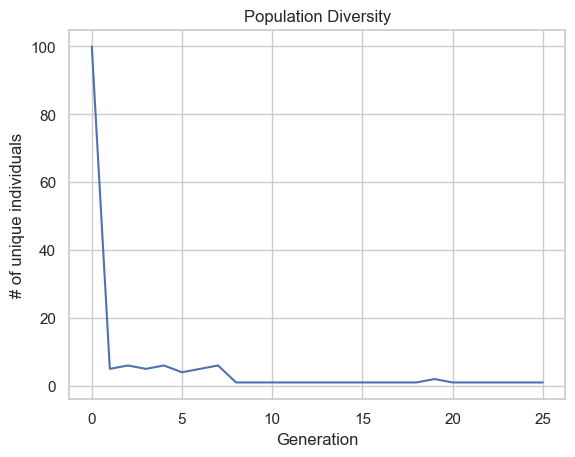

In [71]:
test.plot_diversity()

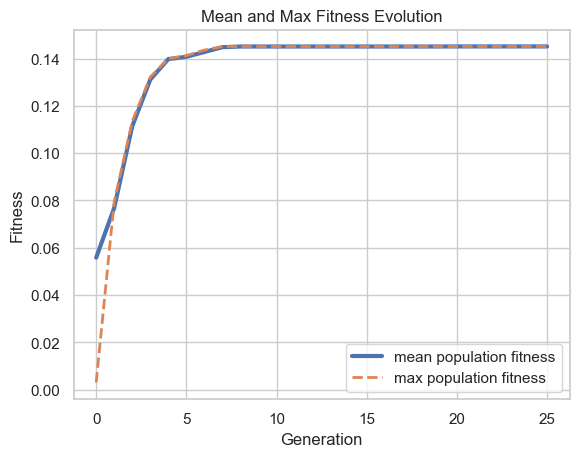

In [72]:
test.plot_fitness()

# Performance

### MBF (mean best fitness)

In [73]:
best_fits, best_returns, risks = MBF(EA, data, 10, p_m=0.1, max_w=0.4, delta=0.7)
print(best_returns.min(), best_returns.max(), best_returns.std())
print(risks.min(), risks.max(), risks.std())

MBF:  -0.0021870293813679663
0.42927479896884635 0.4335939771555009 0.0012971152896576004
0.18709631326804946 0.18895114014743664 0.0005558198240164176


### AES (Average fitness Evaluations to Solution) + SR (Success Rate)

In [ ]:
evals = AES_SR(EA, data, runs=10, solution=0.2563, max_w=0.4, p_m=0.1,)

In [ ]:
np.nanstd(evals)

In [ ]:
evals

### Robustness

In [ ]:
all_data = pd.concat( [data_filled_backward_NC,
                       data_filled_backward_IC,
                       CP_FIBRAS,
                       closing_prices_BONDDIA,
                       closing_prices_CETES,
                       closing_prices_ENERFIN], axis=1 )

In [ ]:
all_data.shape

# PRUEBAS




In [ ]:
daily_returns = all_data.pct_change().mean()*252
risks = all_data.std()
ranking = daily_returns/risks
ranked = ranking.sort_values(ascending=False).index

ranked_data = all_data[ranked]

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True, sharex=True)
axs_i = [[0, 0], [0, 1], [1, 0], [1, 1]]
n_assets = [398, 250, 100, 50]
w_start = [0.005, 0.01, 0.02, 0.04]
for i, n in enumerate(n_assets):
    returns = []
    risks = []
    ws = np.linspace(w_start[i], 0.1, 10)
    sample = ranked_data.iloc[:, :n_assets[i]]
    for w in ws:
        ea = EA(sample, max_w=w)
        ea.run(25)
        best = ea.population[np.argmax(ea.pop_fitness)][:-1]
        _, returns_, risk = ea.fitness(best)
        returns.append(returns_)
        risks.append(risk)
    print(f'{n} assets ws= {ws}')
    ax = axs[axs_i[i][0], axs_i[i][1]]
    scatter = ax.scatter(risks, returns, c=ws, cmap='viridis', s=30)
    cbar = fig.colorbar(scatter, ax=ax)
    ax.set_title(f'{n} Activos')
    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    ax.vlines(0.2, 0, 0.7, color='r', linestyles=':')
plt.suptitle('Efecto del Grado de Diversificación \nde la Cartera')
axs[1, 0].set_xlabel('Riesgo')
axs[1, 1].set_xlabel('Riesgo')
axs[0, 0].set_ylabel('Retorno Esperado')
axs[1, 0].set_ylabel('Retorno Esperado')
plt.tight_layout()
plt.savefig('fit_vs_risk_vs_maxw.jpg')
files.download("fit_vs_risk_vs_maxw.jpg")

## MBF para distintos datasets

### Muestreo Determinista:

In [ ]:
n_assets = [398, 250, 100, 50]
mbfs = np.empty(len(max_w))
for i, n in enumerate(n_assets):
    assets = ranked_data.iloc[:, :n]
    mbf = MBF(EA, assets, runs=10, generations=50, max_w=0.07).mean()
    mbfs[i] = mbf

deterministic_mbf_comparison = pd.DataFrame(mbfs, n_assets)
deterministic_mbf_comparison

### Muestreo Aleatorio

In [ ]:
mbfs = np.empty(len(n_assets))
for i, n in enumerate(n_assets):
    assets = all_data.sample(n, axis=1)
    mbf = MBF(EA, assets, runs=10, generations=50, max_w=0.07).mean()
    mbfs[i] = mbf

random_mbf_comparison = pd.DataFrame(mbfs, n_assets)
random_mbf_comparison

# Evolución del fitness para distintos valores de k (rho en el código)

In [ ]:
best100 = ranked_data.iloc[:, :100]

In [ ]:
ks = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]
for k in ks:
    ea = EA(best100, delta=k, max_w=0.07, pop_size=1000, lambda_=6000)
    ea.run(10)
    ea.plot_max_fitness(label=f'{k}')
plt.legend(bbox_to_anchor=(1, 1.02), title=r'$\delta$')

plt.title('Evolución de Aptitud Máxima')
plt.xlabel('Generación')
plt.tight_layout()
plt.savefig('Evolucion_de_fitness_segun_k.jpg')
files.download("Evolucion_de_fitness_segun_k.jpg")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))
ks = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]
for k in ks:
    ea = EA(best100, delta=k, max_w=0.07)
    returns = []
    risks = []
    for i in range(50):
        ea.run(1)
        best = ea.population[np.argmax(ea.pop_fitness)][:-1]
        _, r, risk = ea.fitness(best)
        returns.append(r)
        risks.append(risk)
    ax[0].plot(returns)
    ax[1].plot(risks, label=k)
plt.legend(bbox_to_anchor=(1, 1.02), title=r'$\delta$')
ax[0].set_ylabel('Retorno Esperado')
ax[1].set_ylabel('Riesgo')
ax[0].set_xlabel('Generación')
ax[1].set_xlabel('Generación')
ax[0].set_title('Evolución de Retorno Esperado')
ax[1].set_title('Evolución del Riesgo')
plt.tight_layout()
plt.savefig('Evolucion_de_retorno_segun_delta.jpg')
files.download('Evolucion_de_retorno_segun_delta.jpg')

### MBF para distintos k.

In [ ]:
ks = np.linspace(0, 1, 11)
mbfs = np.empty(ks.shape)
for i, k in enumerate(ks):
    mbf = MBF(EA, best100, runs=5, delta=k, max_w=0.07).mean()
    mbfs[i] = mbf

plt.plot(ks, mbfs)
plt.xlabel(r'$\delta$')
plt.ylabel('MBF')
plt.title('MBF Según la Tolerancia al Riesgo')
plt.savefig('MBF_vs_delta.jpg')
files.download("MBF_vs_delta.jpg")

### Fitness vs. Riesgo para distintas k

In [ ]:
ks = np.linspace(0, 1, 11)
returns = np.empty(ks.shape)
risks = np.empty(ks.shape)
for i, k in enumerate(ks):
    ea = EA(best100, rho=k, max_w=0.07)
    ea.run(50)
    best = ea.population[np.argmax(ea.pop_fitness)][:-1]
    _, r, risk = ea.fitness(best)
    returns[i] = r
    risks[i] = risk

plt.plot(risks, returns, ':')
sns.scatterplot(x=risks, y=returns, hue=ks, palette='viridis', s=80)
plt.xlabel('Riesgo')
plt.ylabel('Retorno Esperado')
plt.title('Retorno Esperado vs. Riesgo de la Cartera \npara Distintos Valores de $k$')
plt.savefig('fit_vs_risk_vs_k.jpg')
files.download('fit_vs_risk_vs_k.jpg')

### Evolución de diversidad para distintas tasas de mutación ($p_m$)

In [ ]:
pm = [0.0001, 0.005, 0.01, 0.02, 0.05, 0.2]

for i, p in enumerate(pm):
    ea = EA(best100, max_w=0.07, p_m = p)
    ea.run(50)
    fit = ea.max_fit_history
    gens = range(len(fit))
    plt.plot(gens, fit, label=p)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.legend(bbox_to_anchor=(1, 1.02), title=r'$p_m$')
plt.suptitle('Fitness para Distintas Tasas de Mutación')
plt.tight_layout()
plt.savefig('fitness_vs_pm.jpg')
files.download('fitness_vs_pm.jpg')

# Pruebas de Robustez

### Respecto a diferentes activos

In [ ]:
fits = asset_robustness(data=all_data, sample_size=100, pop_size=1000,
                        lambda_=6000, generations=50, max_w=0.07, p_m=0.05)
plt.title('Prueba de Robustez para Distintos Grupos de Activos')
plt.xlabel('Generación')
plt.tight_layout()
plt.savefig('asset_robustness.jpg')
files.download('asset_robustness.jpg')
fits

### Respecto a distintos periodos de tiempo

In [ ]:
fits = time_robustness(data=all_data, periods=6, pop_size=1000,
                        lambda_=6000, generations=50, max_w=0.07, p_m=0.05)
plt.title('Prueba de Robustez para Distintos Periodos de Tiempo')
plt.xlabel('Generación')
plt.tight_layout()
plt.savefig('time_robustness.jpg')
files.download('time_robustness.jpg')
fits

In [ ]:
best_fits = []
ps = [10, 25, 50, 100, 250, 500, 1000]
for p in ps:
    ea = EA(best100, pop_size=p, lambda_=6*p, p_m=0.05, max_w=0.07,
            testing=False)
    ea.run(int(100/np.log10(p)))
    print(p, 'done')
    best_fits.append(ea.pop_fitness.max())
plt.plot(ps, best_fits)
plt.title(r'Fitness Máximo vs. $\mu$')
plt.xscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel('Fitness')
plt.tight_layout()
plt.savefig('fit_vs_pop_size.jpg')
files.download('fit_vs_pop_size.jpg')

In [ ]:
fits1, returns1, risks1 = MBF(EA, best100, p_m=0.05, max_w=0.07, pop_size=1000,
                           delta=0.51, lambda_=6000, runs=10, generations=50)

In [ ]:
returns1.mean(), returns1.std()

In [ ]:
risks1.mean(), risks1.std()

In [ ]:
evals2, returns2, risks2 = AES_SR(EA, best100, solution=0.208, max_risk=0.181,
                               max_gens=50, p_m=0.05, max_w=0.07, delta=0.51,
                               pop_size=1000, lambda_=6000, runs=30)

In [ ]:
plt.scatter(risks2, returns2)
plt.xlabel('Riesgo')
plt.ylabel('Retorno Esperado')
plt.title('Resultados de la Prueba de Desempeño')
plt.tight_layout()
plt.savefig('resultados.jpg')
files.download('resultados.jpg')

In [ ]:
test = EA(best100, p_m=0.05, max_w=0.07, pop_size=2000, lambda_=12000, delta=0.51)
best = test.population[np.argmax(test.pop_fitness)][:-1]
test.fitness(best)

In [ ]:
test.run(1)

In [ ]:
best = test.population[np.argmax(test.pop_fitness)][:-1]
test.fitness(best)

In [ ]:
test.plot_fitness()
plt.xlabel('Generación')
plt.title('Fitness Medio y Máximo por Generación')
plt.legend(labels=['Fitness promedio', 'Fitness Máximo'])
plt.tight_layout()
plt.savefig('ejemplo.jpg')
files.download('ejemplo.jpg')

In [ ]:
test.plot_diversity()
plt.yscale('log')
plt.xlabel('Generación')
plt.ylabel('# de individuos distintos')
plt.title('Evolución de la Diversidad de la Población')
plt.tight_layout()
plt.savefig('diversidad.jpg')
files.download('diversidad.jpg')

In [ ]:
test.portfolio().T

In [ ]:
best100.columns

# Benchmark

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Proyecto_AE/Benchmark.csv'
assets = pd.read_csv(path)

# Extraer los nombres
tickers = assets['Tickers'].tolist()

# Definir el rango de tiempo a considerar en los datos historicos
start = '2021-01-01'
end = '2024-04-05'

# Descargar los precios de cierre ajustados de Yahoo Finance
data = yf.download(tickers, start=start, end=end)['Adj Close'][tickers]

filtered_data = data.dropna(axis=1, thresh=data.shape[0]-10)
data_filled_forward = filtered_data.fillna(method='ffill', axis=0)

# Rellenar las celdas NaN con el valor posterior (si existe)
data_filled_backward = data_filled_forward.fillna(method='bfill', axis=0)

data = data_filled_backward
data